# Obesity Level Prediction - AI Project

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

url='https://drive.google.com/file/d/12dUeEO_rkButPD79pOteFoSSeuIBg5qt/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)

# About The Dataset
The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are: Frequent consumption of high caloric food (**FAVC**), Frequency of consumption of vegetables (**FCVC**), Number of main meals (**NCP**), Consumption of food between meals (**CAEC**), Consumption of water daily (**CH20**), and Consumption of alcohol (**CALC**). The attributes related with the physical condition are: Calories consumption monitoring (**SCC**), Physical activity frequency (**FAF**), Time using technology devices (**TUE**), Transportation used (**MTRANS**)
variables obtained :
**Gender**, **Age**, **Height** and **Weight**.

**NObesity** values are:

* Underweight
* Normal
* Overweight
* Obesity I
* Obesity II
* Obesity III

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
TRAIN_TEST_SPLIT_PERCENTAGE = 0.9
dataset_training = dataset[:int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE)]
dataset_test = dataset[int(len(dataset) * TRAIN_TEST_SPLIT_PERCENTAGE):]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

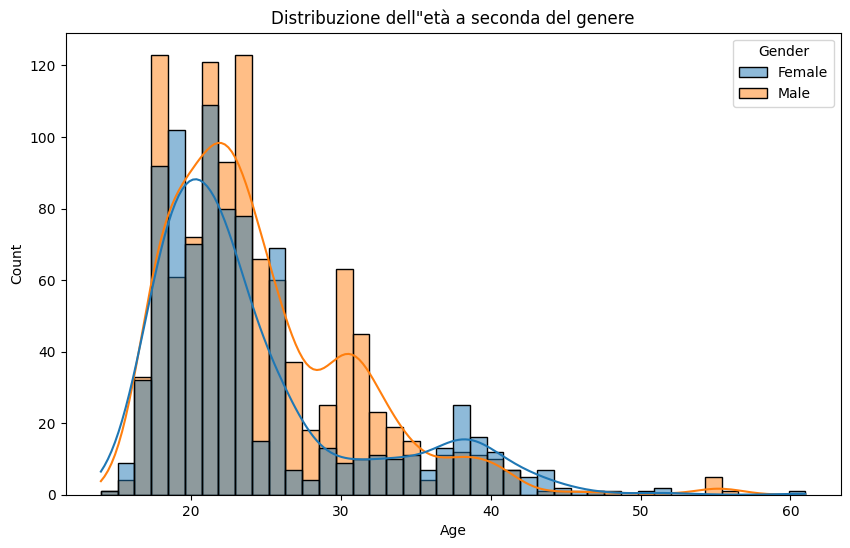

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset_training, x="Age", kde=True, hue="Gender")
plt.title("Distribuzione dell\"età a seconda del genere")
plt.show()

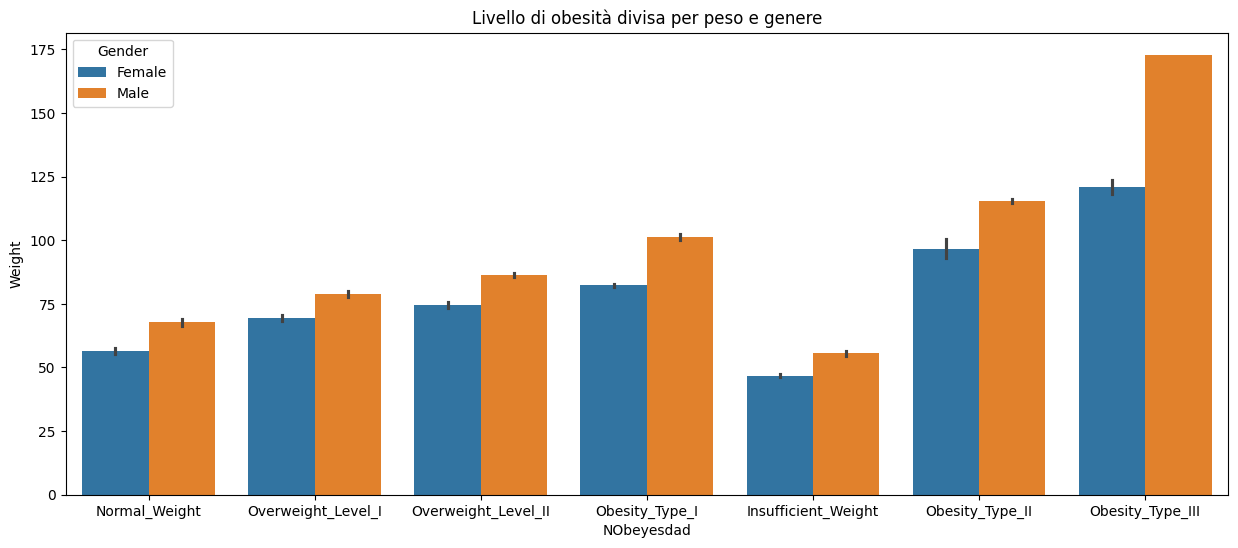

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data=dataset_training, x="NObeyesdad", y="Weight", hue="Gender")
plt.title("Livello di obesità divisa per peso e genere")
plt.show()

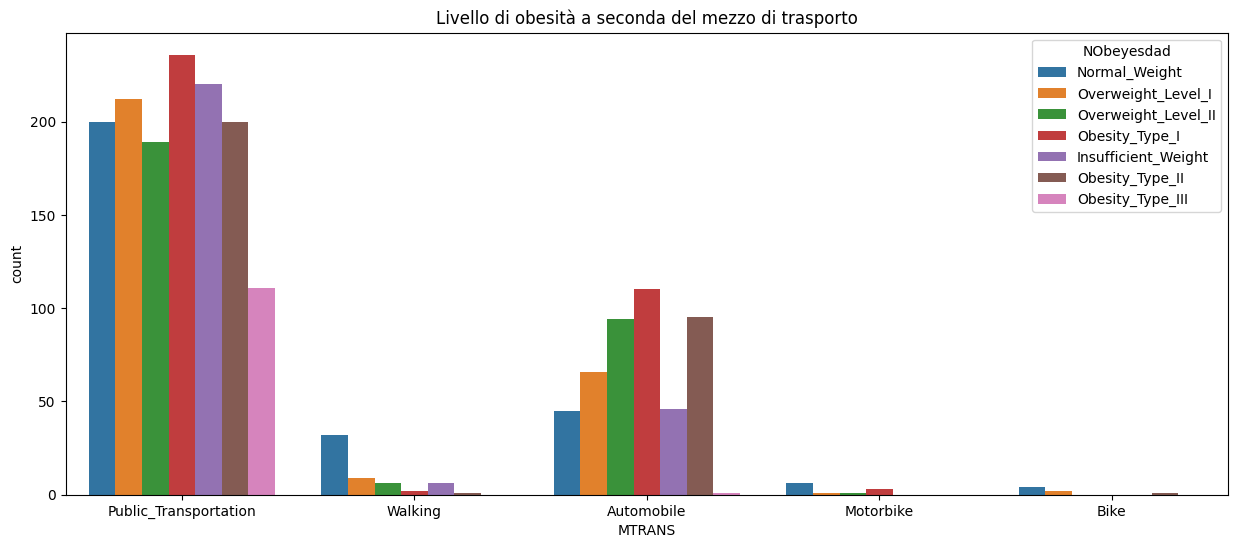

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="MTRANS", hue="NObeyesdad")
plt.title("Livello di obesità a seconda del mezzo di trasporto")
plt.show()

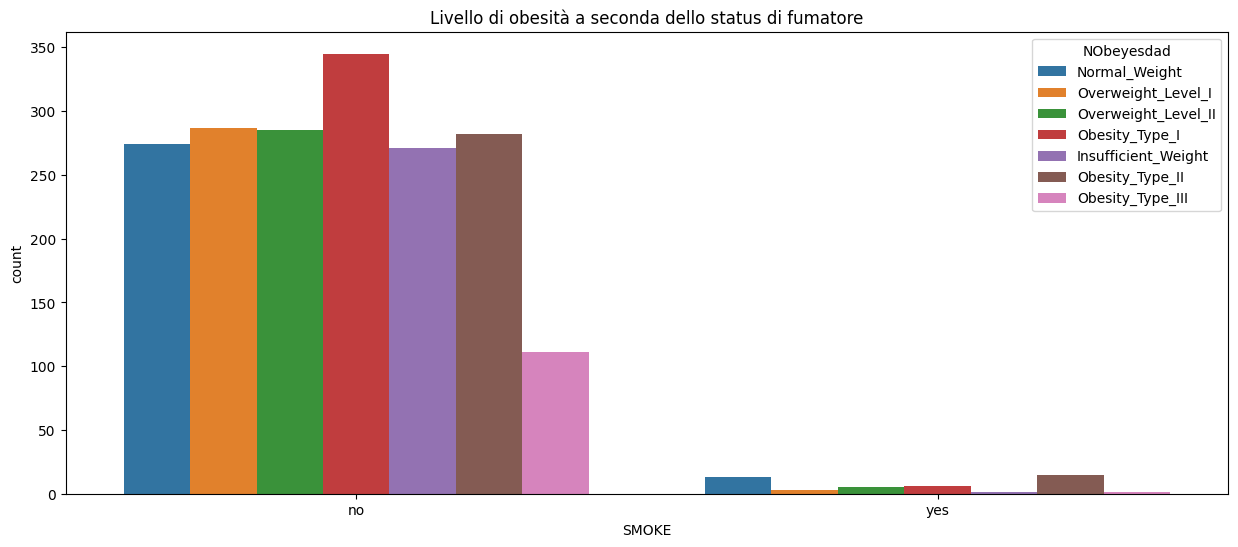

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset_training, x="SMOKE", hue="NObeyesdad")
plt.title("Livello di obesità a seconda dello status di fumatore")
plt.show()

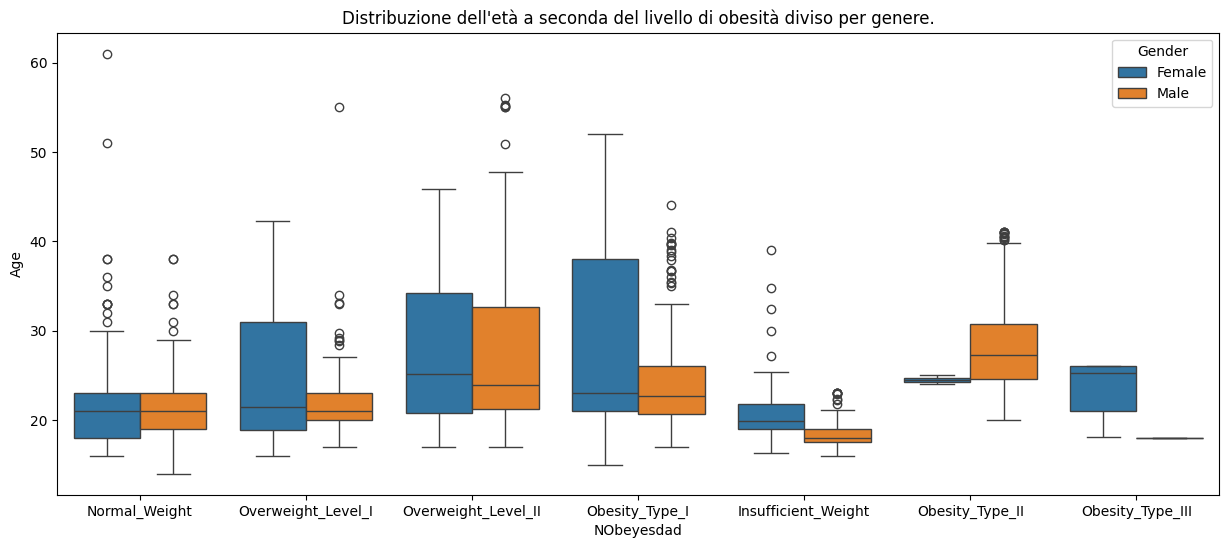

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=dataset_training, x="NObeyesdad", y="Age", hue="Gender")
plt.title("Distribuzione dell'età a seconda del livello di obesità diviso per genere.")
plt.show()

# Grid Search per la scelta degli iperparametri

Un iperparametro è un parametro il cui valore viene utilizzato per controllare il processo di apprendimento di un modello di machine learning. A differenza dei parametri del modello, che vengono appresi durante l'addestramento, gli iperparametri devono essere impostati prima dell'inizio del processo di apprendimento e non vengono ottimizzati dal modello stesso.
La scelta dei corretti iperparametri è cruciale perché può influenzare significativamente le prestazioni del modello.

Per la scelta degli iperparametri ho implementato l'algoritmo del Grid Search che esplora tutte le possibili combinazioni di iperparametri per determinati intervalli di valori. Ogni combinazione viene testata sul Validation set e viene scelta quella che porta alle prestazioni migliori.

La funzione che ho implementato prende come input:
- Il nome dell'algoritmo di cui voglio fare il tuning degli iperparametri
- Un dizionario con chiavi i nomi degli iperparametri e un array dei possibili valori
- Xtraining, Ytraining, Xvalidation, Yvalidation che servono per la fase di training e test


In [ ]:
import itertools
import time
from sklearn.metrics import accuracy_score

# Implementazione Grid Search
def gridSearch(algorithm, hyperparameters, Xtraining, Ytraining, Xvalidation, Yvalidation, classification=True, DT=False):
    bestPerformance = None
    bestHyperp = None

    # Genero tutte le possibili combinazioni di iperparametri dal dizionario
    hyperpCombination = list(itertools.product(*hyperparameters.values()))
    hyperpNames = list(hyperparameters.keys())

    valAccuracies = [] # salvo valore accuracy/MSE per il grafico della  curva di valutazione
    compilationTimes = [] # salvo tempo di esecuzione per il grafico della curva di valutazione

    noImprovementCount = 0 # variabile per tenere traccia delle iterazioni senza miglioramenti
    maxNoImprovement = 3  # numero massimo di iterazioni senza miglioramenti

    # Per ogni combinazione
    for h in hyperpCombination:
        startTime = time.time() #per calcolare il tempo di esecuzione delle varie combinazioni

        model = algorithm(*h)
        model.training(Xtraining,Ytraining)
        # Valuto la combinazione degli iperparametri sul validation set
        Ypred = model.predict(Xvalidation)

        # Per algoritmi di REGRESSIONE uso l'MSE
        if classification == False:
            performance = np.mean((Yvalidation - Ypred)**2)
            endTime = time.time()

            hyperpStr = ', '.join(f"{name}={value}" for name, value in zip(hyperpNames, h))
            print(f"Iperparametri: {hyperpStr}\t  MSE: {performance}")

            if bestPerformance is None or performance < bestPerformance:
              bestPerformance = performance
              bestHyperp = h

        # Per gli algoritmi di CLASSIFICAZIONE uso l'Accuracy
        else:
            #Accuracy
            performance = accuracy_score(Yvalidation,Ypred)
            endTime = time.time()

            hyperpStr = ', '.join(f"{name}={value}" for name, value in zip(hyperpNames, h))
            print(f"Iperparametri: {hyperpStr}\t  Accuracy: {performance}")

            if bestPerformance is None or performance > bestPerformance:
              bestPerformance = performance
              bestHyperp = h
              noImprovementCount = 0  #resetto il contatore se c'è miglioramento
            else:
              noImprovementCount += 1  #incremento il contatore se non c'è miglioramento
            if DT == True:
            # Controllo se il numero massimo di iterazioni senza miglioramenti è stato raggiunto
              if noImprovementCount >= maxNoImprovement:
                  print("Interruzione, nessun miglioramento nelle ultime 3 iterazioni.")
                  break

        # Array con le performance per la curva di valutazione
        valAccuracies.append(performance)
        # Array con i tempi di esecuzione per la curva di valutazione
        compilationTimes.append(endTime-startTime)
    return bestHyperp, valAccuracies, compilationTimes

# Manipolazione dei dati per algoritmi di regressione

1. **Rendo tutti i valori delle features numerici**  
  Gli algoritmi di machine learning implementati non possono elaborare input di tipo stringa, quindi è necessario convertire tutti gli attributi del dataset definiti come stringhe in dati numerici.  
  Per non introdurre un ordinamento tra gli attributi ho utilizzato la codifica one-hot encoding sugli attributi categorici. Questa codifica crea per ogni categoria di un determinato attributo una nuova colonna nel dataset che avrà valori 0 (se il record appartiene a quella categoria) e 1 (se non appartiene a quella categoria).

2. **Shuffle del dataset**  
  Riorganizzo casualmente l'ordine dei dati nel dataset per rendere il modello più robusto e meno dipendente dall'ordine dei dati di training. Questo processo aumenta la probabilità che il modello generalizzi bene su nuovi dati (previene l'overfitting), poiché non si basa sull'ordine specifico in cui sono stati presentati i dati durante l'addestramento.  

3. **Normalizzo i dati per migliorare le prestazioni degli algoritmi**  
  Normalizzo i dati per ridurre l'impatto delle differenze di ordine di grandezza tra le variabili indipendenti e migliorare le prestazioni dell'algoritmo. Ho ottenuto delle caratteristiche con media pari a zero e deviazione standard pari a uno utilizzando la standardizzazione:  
$$
X_{norm} = \frac{X-μ}{σ}
$$  
    con:  
    - μ: la media di ogni feature  
    - σ: la deviazione standard di ogni feature  

4. **Aggiungo la colonna del bias**  
  Aggiungo il termine di bias o intercetta, ovvero una colonna con tutti 1 all'inizio della matrice delle features per migliorare l'accuratezza del modello. Senza questo termine costante il modello sarebbe costretto a passare per l'origine, il che spesso non è realistico e potrebbe portare a un modello meno accurato.  

(*Il punto 3 e 4 servono per la regressione lineare*)  

5. **Divido il dataset in Training set, Test set e Validation set**  
  Il Training set verrà utilizzato per la fase di apprendimento, il Test set servirà per valutare le performance del modello su dati che non sono stati utilizzati nell'addestramento. Ho creato un Validation set (20% del Training Set) che serve per testare diverse combinazioni di iperparametri e scegliere quelli che offrono prestazioni migliori.  
  
6. **Creo le variabili X per le features, e Y per il target**  
  Negli algoritmi di regressione il target è la colonna Weight

Ho utilizzato il dataset ottenuto per la regressione lineare e per la rete neurale.

In [ ]:
from random import shuffle
dataset = pd.read_csv(dwn_url)

#1. One-hot encoding utilizzando la funzione get_dummies di pandas per convertire gli attributi di tipo stringa in tanti
#attributi numerici  con valore 0/1 quante sono le categorie di quell'attributo
dataEncoded = pd.get_dummies (dataset, columns=['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS' , 'NObeyesdad'], dtype = int)

#2. Shuffle dei dati
indices = list(dataEncoded.index) # ottengo l'elenco degli indici delle righe del DataSet
shuffle(indices) # mescolo l'ordine degli indici in modo casuale
dataEncoded = dataEncoded.iloc[indices].reset_index(drop=True) # mescolo le righe in base all'ordine casuale degli indici

#3. Normalizzazione del dataset
dataEncodedN = dataEncoded.copy() #Faccio una copia del dataset per normalizzarlo
meanValue = dataEncodedN.mean()
stdValue = dataEncodedN.std()
dataEncodedN = (dataEncodedN - meanValue)/stdValue

#4. Aggiungo la colonna del bias
ones = np.ones(len(dataEncodedN), dtype=int)
dataEncodedN.insert(0, "Bias", ones, True)

# Training set di 1519 campioni, Test set di 212 campioni, Validation set di 380 campioni = 2111 campioni totali
TRAINING_VALIDATION_SPLIT_PERCENTAGE = 0.8

#5. Divido il dataset normalizzato in Training Set, Test Set e Validation Set
trainingSetN = dataEncodedN[:int(len(dataEncodedN) * TRAIN_TEST_SPLIT_PERCENTAGE)]
testSetN = dataEncodedN[int(len(dataEncodedN) * TRAIN_TEST_SPLIT_PERCENTAGE):]

trainingSetAuxN = trainingSetN.copy()
lenTrainingSetN = len(trainingSetN)
trainingSetN = trainingSetN[:int(len(trainingSetN) * TRAINING_VALIDATION_SPLIT_PERCENTAGE)]
validationSetN = trainingSetAuxN[int(lenTrainingSetN * TRAINING_VALIDATION_SPLIT_PERCENTAGE):]

#5. Divido il dataset non normalizzato in Training Set, Test Set e Validation Set
trainingSet = dataEncoded[:int(len(dataEncoded) * TRAIN_TEST_SPLIT_PERCENTAGE)]
testSet = dataEncoded[int(len(dataEncoded) * TRAIN_TEST_SPLIT_PERCENTAGE):]

trainingSetAux = trainingSet.copy()
lenTrainingSet = len(trainingSet)
trainingSet = trainingSet[:int(len(trainingSet) * TRAINING_VALIDATION_SPLIT_PERCENTAGE)]
validationSet = trainingSetAux[int(lenTrainingSet * TRAINING_VALIDATION_SPLIT_PERCENTAGE):]

#Per la rete neurale
trainingSetNN = trainingSet.copy()
testSetNN = testSet.copy()
validationSetNN = validationSet.copy()

#6. Creo la variabile X delle variabili indipendenti, le nostre features (per il training, test e validation) selezionando tutte le colonne tranne Weight
XtrainingN = trainingSetN.drop(columns=['Weight']).values
XtestN = testSetN.drop(columns=['Weight']).values
XvalidationN = validationSetN.drop(columns=['Weight']).values
Xtraining = trainingSet.drop(columns=['Weight']).values
Xtest = testSet.drop(columns=['Weight']).values

#6. Creo la variabile Y della variabile dipendente ovvero il target (per il training, test e validation) selezionando solo la colonna Weight
YtrainingN = trainingSetN['Weight'].values
Ytest = testSet['Weight'].values
Ytraining = trainingSet['Weight'].values
Yvalidation = validationSet['Weight'].values

# 1. Linear Regression

## Implementazione regressione lineare  
Un algoritmo di regressione lineare serve per modellare la relazione tra una variabile dipendente Y (la colonna Weight) e le variabili indipendenti X (le altre colonne del dataset) attraverso una funzione lineare.
In questo caso ho una regressione lineare multipla che si può scrivere nella forma:
$$
Y' = c^TX
$$
con:  
- $X$ = matrice delle features (inclusa la colonna di bias)  
- $Y$ = vettore dei valori target  
- $c$ = vettore dei coefficienti da stimare

Nella fase di addestramento sui dati di training ho calcolato i coefficienti c che minimizzano la funzione di costo, ovvero quei valori che sono in grado di minimizzare lo scarto tra i valori reali e quelli predetti. Ho utilizzato la formula chiusa:  
$$
c = (X^TX)^{-1}X^TY
$$

Successivamente ho utilizzato il modello ottenuto (la learned function) per predire i valori dei pesi sulla base delle altre variabili del Test set.

In [ ]:
#Definizione della classe per il modello di regressione lineare
class MyLinearRegression:
    def __init__(self):
        self.c = None

    #Addestramento del modello (fitting)
    def training(self, XtrainingN, YtrainingN):
        #Prodotto matriciale X^TX
        XTX = np.dot(XtrainingN.T, XtrainingN) #Dot è il prodotto matriciale .T trasposta
        #Prodotto matriciale X^TY
        XTY = np.dot(XtrainingN.T, YtrainingN)
        #Calcolo c = (X^TX)^-1 X^TY
        c = np.dot(np.linalg.pinv(XTX), XTY)
        self.c = c

    # Fase di predizione sui valori del testSet Y'= c*Xtest
    def predict(self,XtestN):
        YpredN = np.dot(XtestN, self.c)
        return YpredN


## Metriche di valutazione   
Per valutare le prestazioni del mio modello di regressione lineare ho utilizzato 3 metriche di valutazione:   
- **Mean Squared Error** che calcola la media dei quadrati degli errori $y_i - \hat{y_i}$  
$$
\frac{1}{n} \sum\limits_{i=1}^{n} \Big(y_i - \hat{y_i}\Big)^2
 $$

- **Mean Absolute Error** che misura la media delle differenze assolute tra $y_i - \hat{y_i}$
$$
\frac{\sum\limits_{i=1}^{n} |y_i-\hat{y_i}|}{n}
 $$

- **Root Mean Square Error**
$$
\sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} \Big(y_i - \hat{y_i}\Big)^2}
$$

con:  
- $y_i$ = valore reale dell'attributo Weight
- $\hat y_i$ = valore predetto dell'attributo Weight
  
Il mio modello fa previsioni abbastanza accurate con un errore medio nel predire il peso di 4/5 kg.  
La differenza tra MAE e RMSE suggerisce che ci potrebbero essere alcuni errori significativamente grandi, infatti l'RMSE penalizza maggiormente gli errori grandi rispetto a quelli piccoli (le differenze tra dati reali e dati predetti sono elevate al quadrato). Il rapporto tra RMSE e MAE rimane comunque abbastanza basso, questo è un buon indicatore che non ci sono eccessivi errori grandi.

In [ ]:
# Calcolo delle metriche per il mio modello di regressione lineare
def lrMetrics(Ypred, Ytest):
    # Calcolo MSE
    MSE = np.mean((Ytest - Ypred)**2)
    # Calcolo MAE
    MAE = np.mean(np.abs(Ytest - Ypred))
    # Calcolo RMSE
    RMSE = np.sqrt(MSE)
    print("Il mio modello di regressione lineare ha ")
    print("MSE: ", MSE)
    print("MAE: ", MAE)
    print("RMSE: ", RMSE,"\n")
    return Ypred, MSE, MAE, RMSE

modelLr = MyLinearRegression()
modelLr.training(XtrainingN,YtrainingN)
YpredLrN = modelLr.predict(XtestN)
#De-normalizzo i valori per poter calcolare le metriche
YpredLr = YpredLrN * stdValue["Weight"] + meanValue["Weight"]
lrmetrics = lrMetrics(YpredLr, Ytest)
MSElinearRegression = lrmetrics[1]
MAElinearRegression = lrmetrics[2]
RMSElinearRegression = lrmetrics[3]

Il mio modello di regressione lineare ha 
MSE:  21.30096559730274
MAE:  3.547995560362262
RMSE:  4.615296913233507 



In [ ]:
# Confronto i valori predetti con quelli reali
pd.DataFrame({'Ypred': YpredLr, 'Ytest': Ytest})

,Ypred,Ytest
0,115.167167,111.878132
1,86.054906,82.000000
2,69.277234,75.000000
3,114.435402,113.069667
4,52.238230,50.248677
...,...,...
207,111.118665,102.320437
208,72.596902,71.813380
209,116.971318,104.791035
210,43.313685,45.000000


**Implementazione con Scikit-learn per valutare le performance del mio modello**  

Il fatto che le metriche calcolate con Scikit-learn siano molto simili a quelle ottenute con la mia implementazione dimostra che ho implementato correttamente il modello.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Implementazione con sklearn
modelLrSklearn = LinearRegression()
modelLrSklearn.fit(Xtraining,Ytraining)
YpredSklearnLr = modelLrSklearn.predict(Xtest)

MSEsklearn = mean_squared_error(Ytest, YpredSklearnLr)
MAEsklearn = mean_absolute_error(Ytest, YpredSklearnLr)
RMSEsklearn = np.sqrt(MSEsklearn)

print("Modello di regressione lineare scikit-learn ha ")
print("MSE: ", MSEsklearn)
print("MAE: ", MAEsklearn)
print("RMSE: ", RMSEsklearn,"\n")

Modello di regressione lineare scikit-learn ha 
MSE:  21.30096559730272
MAE:  3.5479955603622613
RMSE:  4.6152969132335055 



**Grafico delle features più rilevanti**  

Avendo calcolato i coefficienti c che minimizzano la funzione di loss posso valutare quali variabili indipendenti (features) hanno il maggior impatto sulla variabile dipendente (Weight). Infatti il valore assoluto di c indica quanto varia la variabile dipendente y per una variazione unitaria nella variabile indipendente $x_i$, più c è alto più la feature $x_i$ ha un impatto maggiore su y.  
Dal grafico sottostante ricaviamo che i diversi livelli di NObeyesdad sono le features più rilevanti, questo risultato era prevedibile considerando che il modello cerca di predire il peso dei diversi camipioni, e il peso è strettamente correlato con delle variabili che indicano il livello di obesità.


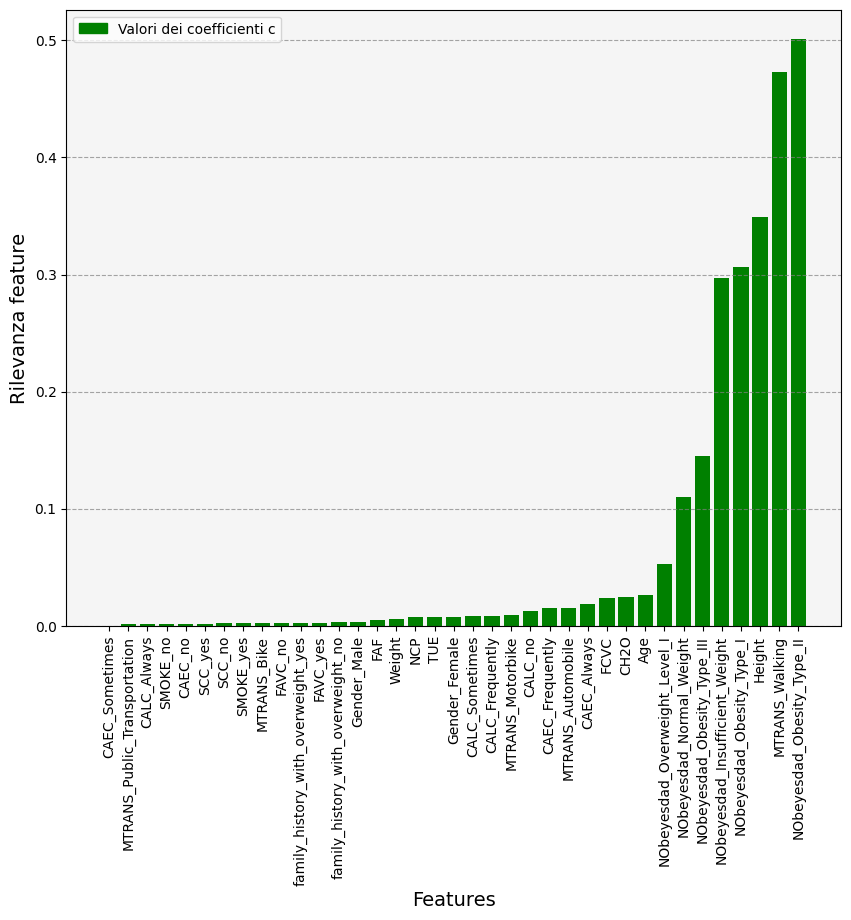

In [ ]:
from matplotlib.patches import Patch

# Grafico delle features più rilevanti
cVal = np.abs(modelLr.c)[1:] #prendo i coefficienti di c escludendo il bias
i = np.argsort(cVal) # ordino in modo crescente i coefficienti
plt.figure(figsize=(10,8))
bars = plt.bar(np.arange(len(i)), cVal[i], color='green') #creo il grafico a barre
features = dataEncodedN.drop(columns=['Weight'])
features = dataEncodedN.drop(columns=['Bias']) # tolgo colonna del bias
names = features.columns

plt.xticks(range(len(i)), names[i], rotation=90)
plt.ylabel('Rilevanza feature', fontsize=14)
plt.xlabel('Features', fontsize=14)
legend_patch = Patch(color='green', label='Valori dei coefficienti c')
plt.legend(handles=[legend_patch])
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')  #aggiungo una linea tratteggiata orizzontale
plt.gca().set_facecolor('whitesmoke')
plt.gca().xaxis.grid(False)
plt.show()

# Manipolazione dei dati per algoritmi di classificazione

Per gli algoritmi di classificazione ho eseguito le seguenti manipolazioni sul dataset (essendo alcuni passaggi equivalenti a quelli per la regressione, si rimanda al paragrafo "Manipolazione dei dati per algoritmi di regressione" per una spiegazione più dettagliata):  
1. One-hot encoding per attributi non numerici
2. Trasformazione dell'attributo NObesity in un attributo binario: per semplificare il problema di classificazione e migliorare le performance del modello.
3. Arrotondamento dei dati: utile negli algoritmi di classificazione per semplificare il modello ottenendo una suddivisione più chiara dei dati Questa operazione riduce anche l'impatto dei possibili errori di misurazione che i dati reali spesso possono contenere.
4. Shuffle del dataset
5. Divisione del dataset in trainingSet, testSet e validationSet
6. Creazione delle Variabili X per le features e Y per il target (per la classificazione è NObeyesdad)
7. Normalizzazione dei dati (utile nella regressione logistica)

Ho utilizzato il dataset ottenuto per l'albero di decisione, la regressione logistica e per il knn.

In [ ]:
#1. One-hot encoding senza NoBeyesdad
dataEncodedClass = pd.get_dummies (dataset, columns=['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS' ], dtype = int)

#2. Rendo l'attributo NoBeyesdad binario (fino alla categoria Overweight valore 0, per le altre 1)
NObesityBinary = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 0,
    "Overweight_Level_I": 0,
    "Overweight_Level_II": 0,
    "Obesity_Type_I": 1,
    "Obesity_Type_II": 1,
    "Obesity_Type_III": 1
    }
dataEncodedClass["NObeyesdad"] = dataEncodedClass["NObeyesdad"].map(NObesityBinary)

#3. Arrotondo gli attributi che non assumono valori interi, moltiplico per 10 i valori prima di arrotondarli per aumentare la precisione dell'arrotondamento
dataEncodedClass['Age'] = (dataEncodedClass['Age']*10).round()
dataEncodedClass['Height'] = (dataEncodedClass['Height']*10).round()
dataEncodedClass['Weight'] = (dataEncodedClass['Weight']*10).round()
dataEncodedClass['FCVC'] = (dataEncodedClass['FCVC']*10).round()
dataEncodedClass['NCP'] = (dataEncodedClass['NCP']*10).round()
dataEncodedClass['CH2O'] = (dataEncodedClass['CH2O']*10).round()
dataEncodedClass['FAF'] = (dataEncodedClass['FAF']*10).round()
dataEncodedClass['TUE'] = (dataEncodedClass['TUE']*10).round()

#4. Shuffle del dataset
indices = list(dataEncodedClass.index) # ottengo l'elenco degli indici delle righe del DataSet
shuffle(indices) # mescolo l'ordine degli indici in modo casuale
dataEncodedClass = dataEncodedClass.iloc[indices].reset_index(drop=True) # mescolo le righe in base all'ordine casuale degli indici

#5. Divido il dataset in Training Set, Test Set e Validation Set
trainingSetClass = dataEncodedClass[:int(len(dataEncodedClass) * TRAIN_TEST_SPLIT_PERCENTAGE)]
testSetClass = dataEncodedClass[int(len(dataEncodedClass) * TRAIN_TEST_SPLIT_PERCENTAGE):]

trainingSetAux = trainingSetClass.copy()
lenTrainingSet = len(trainingSetClass)
trainingSetClass = trainingSetClass[:int(len(trainingSetClass) * TRAINING_VALIDATION_SPLIT_PERCENTAGE)]
validationSetClass = trainingSetAux[int(lenTrainingSet * TRAINING_VALIDATION_SPLIT_PERCENTAGE):]

#6. Creo la variabile X delle variabili indipendenti, le nostre features (per il training, test e validation)
XtrainingClass = trainingSetClass.drop(columns=['NObeyesdad']).values
XtestClass = testSetClass.drop(columns=['NObeyesdad']).values
XvalidationClass = validationSetClass.drop(columns=['NObeyesdad']).values

#6. Creo la variabile Y, della variabile dipendente ovvero il target (per il training, test e validation)
YtrainingClass = trainingSetClass['NObeyesdad'].values
YtestClass = testSetClass['NObeyesdad'].values
YvalidationClass = validationSetClass['NObeyesdad'].values

#7. Normalizzazione del dataset (per regressione logistica)
dataEncodedClassN = dataEncodedClass.copy() #Faccio una copia del dataset per normalizzarlo
meanValueClass = dataEncodedClassN.mean()
stdValueClass = dataEncodedClassN.std()
dataEncodedClassN = (dataEncodedClassN - meanValueClass)/stdValueClass

# Divido il dataset normalizzato in Training Set, Test Set e Validation Set
trainingSetClassN = dataEncodedClassN[:int(len(dataEncodedClassN) * TRAIN_TEST_SPLIT_PERCENTAGE)]
testSetClassN = dataEncodedClassN[int(len(dataEncodedClassN) * TRAIN_TEST_SPLIT_PERCENTAGE):]

trainingSetAuxN = trainingSetClassN.copy()
lenTrainingSetN = len(trainingSetClassN)
trainingSetClassN = trainingSetClassN[:int(len(trainingSetClassN) * TRAINING_VALIDATION_SPLIT_PERCENTAGE)]
validationSetClassN = trainingSetAuxN[int(lenTrainingSetN * TRAINING_VALIDATION_SPLIT_PERCENTAGE):]

#Creo la variabile X delle variabili indipendenti, le nostre features (per il training, test e validation) selezionando tutte le colonne tranne Weight
XtrainingClassN = trainingSetClassN.drop(columns=['NObeyesdad']).values
XtestClassN = testSetClassN.drop(columns=['NObeyesdad']).values
XvalidationClassN = validationSetClassN.drop(columns=['NObeyesdad']).values

#Creo la variabile Y, della variabile dipendente ovvero il target per il training selezionando solo la colonna Weight
YtrainingClassN = trainingSetClassN['NObeyesdad'].values

# 2. Decision Trees for Binary Classification

L'obiettivo è di creare un modello che sia in grado di classificare gli individui in due categorie di obesità in base ai valori delle features disponibili.

## Implementazione Albero di decisione  

Per implementare l'albero ho creato una classe DecisionTree e una classe Node per i suoi nodi.  

Nella <u>fase di apprendimento</u>, per costruire l'albero di decisione, ho utilizzato l'approccio greedy visto a lezione implementando l'algoritmo LearningDecisionTree che segue i seguenti passi ricorsivi:
- **Passo Base**:
  1. Nessun campione rimasto nel sottoinsieme del dataset attuale, sono arrivato ad un nodo foglia, gli assegno l'etichetta più comune del nodo padre.
  2. Tutti i campioni rimasti nella partizione del dataset hanno la stessa etichetta (tutti 1 o tutti 0), il nodo è una foglia e gli assegno quella etichetta.
  3. Nessun attributo rimasto, il nodo è una foglia e gli assegno l'etichetta più comune dei campioni rimanenti.
- **Selezione della feature migliore (più discriminante)**:  
  L'obiettivo di un classificatore è quello di suddividere i campioni a disposizione nel Training set in modo da minimizzare l'entropia (il livello di disordine nei dati). Per raggiungere questo obiettivo ad ogni livello si sceglie tra tutti gli attributi quello che massimizza l'information gain.  
  <u>L'information gain</u> rappresenta la quantità di informazione che la feature è in grado di fornirci sull'attributo che vogliamo classificare (NObeyesdad):
  $$
  Gain(A)=B \Big(\frac{p}{p+n}\Big) - Remainder(A)
  $$    
  con:  
  - $p$ = campioni positivi  
  - $p+n$ = campioni totali

  La funzione Gain(A) calcola la riduzione di entropia attesa scegliendo di fare lo split sull'attributo A, è infatti la differenza tra l'entropia dell'output del dataset corrente e il Remainder(A), ovvero l'entropia della variabile di output quando prendo un sottoinsieme del dataset generato scegliendo A per lo split.
  $$
  Remainder(A)=\sum\limits_{k=1}^{d} \frac{p_k+n_k}{p+n} B\Big (\frac{p_k}{p_k+n_k}\Big)
  $$  
  Ho calcolato il valore dell'<u>entropia</u> con la formula:
  $$
  B(q)=-\Big( q\log_2q + (1-q) \log_2(1-q) \Big)
  $$
  con:  
  - $q$ = probabilità che la variabile assuma valore 1
- **Divisione del dataset in due sottoinsiemi**: in base all'attributo e alla soglia scelti per fare lo split.
- **Passo ricorsivo**: applico l'algoritmo ai due sottoinsiemi.  

Ho così ottenuto un albero di decisione in cui ogni nodo rappresenta una decisione basata su una feature, e ogni foglia rappresenta l'output della classificazione, 0 se l'individuo è sottopeso, 1 se l'individuo è sovrappeso.

Nella <u>fase di testing</u> ho attraversato l'albero di decisione con i dati del Test set per poter valutare gli output ottenuti.

In [ ]:
import numpy as np
from collections import Counter

# Classe per un nodo del DecisionTree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature          # indice della feature su cui splittare l'albero
        self.threshold = threshold      # valore soglia per lo split
        self.left = left                # sottoalbero sinistro
        self.right = right              # sottoalbero destro
        self.value = value              # valore del nodo (per i nodi foglia)

    # Metodo per controllare se un nodo è una foglia
    def isLeaf(self):
        if self.value is not None:
            return True
        else:
            return False

# Classe che rappresenta il DecisionTree
class DecisionTree:
    def __init__(self, maxDepth=5):
        self.minSplit = 2              # numero minimo di campioni per effettuare uno split
        self.maxDepth = maxDepth       # profondità massima dell'albero
        self.root = None               # radice dell'albero

    # Fase di addestramento
    def training(self, X, y):
        self.numFeatures = X.shape[1]               # numero di features nel dataset
        self.root = self.learningDecisionTree(X, y) # costruisco l'albero a partire dalla radice

    # Metodo ricorsivo per costruire l'albero
    def learningDecisionTree(self, X, y, depth=0, yParent=None):
        numSamplesLeft, numFeatsLeft = X.shape  #numero di campioni rimasti, numero di features rimaste
        numLabels = len(np.unique(y))     #le etichette assumono valore 0 o 1

        # 1. Se non ci sono campioni nella partizione, restituisco il plurality value del genitore
        if numSamplesLeft == 0:
            leafValue = self.pluralityValue(yParent)
            return Node(value=leafValue)

        # 2. Se tutti gli esempi hanno la stessa classificazione (tutti 1 o tutti 0) restituisco la classificazione
        if numLabels == 1:
            leafValue = self.pluralityValue(y)
            return Node(value=leafValue)

        # 3. Se non ci sono attributi rimasti, restituisco il plurality value dei campioni rimasti nella partizione
        if (depth >= self.maxDepth or numLabels == 1 or numSamplesLeft < self.minSplit):
            leafValue = self.pluralityValue(y) # assegna il valore della foglia
            return Node(value=leafValue)

        # 4. Se non sono in nessuno dei 3 casi precedenti devo selezionare l'attributo più discriminante
        numFeatures = self.numFeatures
        featIndexes = np.random.choice(numFeatsLeft, numFeatures, replace=False) # seleziona le feature casualmente
        # Trovo la feature migliore e la soglia su cui fare split
        bestFeature, bestThresh = self.importance(X, y, featIndexes)

        # 5. Passo ricorsivo, divido il dataset e creo i nodi figli
        leftIdxs, rightIdxs = self.split(X[:, bestFeature], bestThresh)
        left = self.learningDecisionTree(X[leftIdxs, :], y[leftIdxs], depth + 1, y)
        right = self.learningDecisionTree(X[rightIdxs, :], y[rightIdxs], depth + 1, y)
        return Node(bestFeature, bestThresh, left, right)

    # Fase di testing, metodo per predire le etichette (0 o 1) per un insieme di dati
    def predict(self, X):
        return np.array([self.traverseTree(x, self.root) for x in X])

    # Metodo per attraversare l'albero decisionale
    def traverseTree(self, x, node):
        if node.isLeaf():
            return node.value

        if x[node.feature] <= node.threshold:  #se per quell'individuo
            return self.traverseTree(x, node.left)
        return self.traverseTree(x, node.right)


#FUNZIONI UTILIZZATE NELL'ALGORITMO LEARNING DECISION TREE:

    # Metodo per trovare l'attributo che massimizza il gain tra quelli rimasti
    def importance(self, X, y, featIndexes):
        bestGain = -1
        splitIdx, splitThreshold = None, None

        for featIndex in featIndexes:       #per ogni feature rimasta
            Xcolumn = X[:, featIndex]       #estraggo la colonna corrispondente all'indice di quella feature
            thresholds = np.unique(Xcolumn)

            for thr in thresholds:          #per ogni valore unico nella colonna (quindi per ogni possibile soglia di split)
                gain = self.informationGain(y, Xcolumn, thr)  #calcolo il gain se divido il dataset con la soglia scelta per la feature corrente
                if gain > bestGain:
                    bestGain = gain
                    splitIdx = featIndex
                    splitThreshold = thr

        return splitIdx, splitThreshold      #splitIdx=indice della colonna(feature) su cui fare lo split in base alla soglia splitThreshold

    # Metodo per calcolare l'informationGain
    def informationGain(self, y, Xcolumn, threshold):
        # Entropia dell'output sul dataset corrente
        parentEntropy = self.entropy(y)

        # Creo i figli
        leftIdxs, rightIdxs = self.split(Xcolumn, threshold)

        if len(leftIdxs) == 0 or len(rightIdxs) == 0:
            return 0

        # Calcolo il numero di campioni dei nodi figli
        numSamples = len(y)
        numSamplesPositive, numSamplesNegative = len(leftIdxs), len(rightIdxs)

        # Calcolo entropia dei nodi figli
        entropyL, entropyR = self.entropy(y[leftIdxs]), self.entropy(y[rightIdxs])

        #Calcolo il Remainder
        childEntropy = (numSamplesPositive / numSamples) * entropyL + (numSamplesNegative / numSamples) * entropyR

        # Calcolo Gain = parentEntropy - Remainder
        Gain = parentEntropy - childEntropy
        return Gain

    # Metodo per suddividere il dataset in base alla soglia di split
    def split(self, Xcolumn, split_thresh):
        #Trovo gli indici dei campioni per cui la feature considerata è minore/maggiore della soglia
        leftIdxs = np.argwhere(Xcolumn <= split_thresh).flatten()
        rightIdxs = np.argwhere(Xcolumn > split_thresh).flatten()
        return leftIdxs, rightIdxs

    # Metodo per calcolare l'entropia
    def entropy(self, y):
        if len(y) == 0:
            return 0
        p = np.sum(y)/len(y) # probabilità osservazioni positive (assumendo etichette binarie 0 e 1)
        if p == 0 or p == 1:
          return 0

        return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

    # Metodo per trovare l'etichetta più comune
    def pluralityValue(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value


## Scelta degli iperparametri  

È importante scegliere correttamente il valore dell'iperparametro **altezza massima di un albero di decisione** poichè una profondità troppo piccola potrebbe non catturare la complessità dei dati portando ad underfitting, mentre una profondità troppo grande potrebbe portare il modello ad adattarsi troppo bene ai dati di training perdendo la capacità di generalizzare su dati nuovi, portando all'overfitting.  

Per scegliere il parametro ho utilizzato l'algoritmo di Grid Search implementato sopra che per ogni valore di maxDepths (io ho scelto di valutare le profondità tra 1 e 19) addestra il mio modello di DecisionTree sul Training set e calcola l'Accuracy sul Validation set scegliendo il valore che restituisce l'Accuracy più alta. L'algoritmo si ferma se dopo tre iterazioni il valore dell'Accuracy non cambia o diminuisce.  

Ho riportato anche il grafico della curva di valutazione, che mostra come varia il valore dell'Accuracy all'aumentare della profondità massima dell'albero.

Iperparametri: Max Depth=1	  Accuracy: 0.9131578947368421
Iperparametri: Max Depth=2	  Accuracy: 0.9131578947368421
Iperparametri: Max Depth=3	  Accuracy: 0.9736842105263158
Iperparametri: Max Depth=4	  Accuracy: 0.9842105263157894
Iperparametri: Max Depth=5	  Accuracy: 0.9763157894736842
Iperparametri: Max Depth=6	  Accuracy: 0.9763157894736842
Iperparametri: Max Depth=7	  Accuracy: 0.9789473684210527
Interruzione, nessun miglioramento nelle ultime 3 iterazioni.
La scelta migliore per maxDepth è: 4


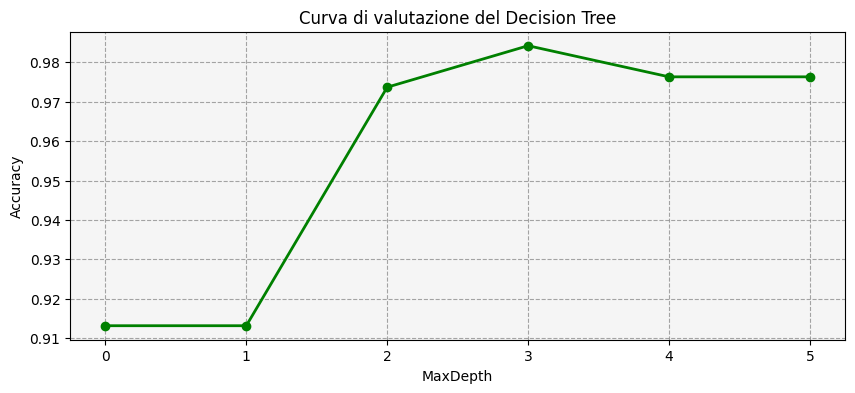

In [ ]:
from sklearn.metrics import accuracy_score

# Scelta del valore migliore per maxDepth per l'albero di decisione
maxDepthsValues = [i for i in range(1, 20)]
hyperpDT = {'Max Depth':maxDepthsValues}
bestHyperpDT,valAccuraciesDT,compilationTimes = gridSearch(DecisionTree,hyperpDT,XtrainingClass,YtrainingClass,XvalidationClass,YvalidationClass, True, True)
bestMaxDepthDT = bestHyperpDT[0]

# Selezione del migliore maxDepth
print(f'La scelta migliore per maxDepth è: {bestMaxDepthDT}')

# Tracciamento della curva di valutazione
plt.figure(figsize=(10, 4))
plt.plot(range(len(valAccuraciesDT)), valAccuraciesDT, color='green', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')
plt.title('Curva di valutazione del Decision Tree')
plt.gca().set_facecolor('whitesmoke')
plt.grid(True, linestyle='--',alpha=0.7, color='gray')
plt.show()

## Metriche di valutazione  
Come metriche di valutazione ho usato:  
- **Accuracy**: restituisce la percentuale di campioni correttamente classificati, è un indicatore di quanto possiamo affidarci alle predizioni del modello.
$$
Accuracy = \frac{Numero\ di\ previsioni\ corrette}{Numero\ totale\ di\ previsioni}
$$

- **Precision**: restituisce la percentuale di campioni positivi correttamente identificati rispetto al totale delle previsioni positive, rappresenta quanto possiamo fidarci di una predizione positiva del modello.
$$
Precision= \frac{Vero\ Positivi}{Vero\ Positivi+Falso\ Positivi}
$$

- **Recall** (True Positive Rate): restituisce la percentuale di campioni positivi correttamente identificati rispetto al totale degli campioni positivi reali.
$$
Recall= \frac{Vero\ Positivi}{Vero\ Positivi+Falso\ Negativi}
$$

Ho ottenuto che il mio modello ha una accuratezza molto elevata. Anche la Recall è elevata, il modello riesce a catturare quasi tutti i casi positivi, anche se il valore della Precision e il numero di falsi positivi (in alto a destra) della matrice di confusione ci fanno capire che ci sono alcune predizioni positive non corrette.

Il modello di Scikit-learn ha delle prestazioni molto simile alla mia implementazione.

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve

# Calcolo delle metriche per il mio modello di decision tree
def accuracy(Ytest, Ypred):
    return np.sum(Ytest == Ypred) / len(Ytest)

modelDT = DecisionTree(maxDepth=bestMaxDepthDT)
modelDT.training(XtrainingClass, YtrainingClass)
YpredDT = modelDT.predict(XtestClass)
#Accuracy
accDT = accuracy(YtestClass, YpredDT)
#Recall
recDT = recall_score(YtestClass, YpredDT)
#Precision
precDT = precision_score(YtestClass, YpredDT)
print(f"Il mio Decision Tree con maxDepth = {bestMaxDepthDT},\n Accuracy di {accDT},\n Precision di {precDT},\n Recall di {recDT}\n")

#Confronto con Scikit-learn:
from sklearn.tree import DecisionTreeClassifier

modelDTSklearn = DecisionTreeClassifier(max_depth=bestMaxDepthDT)
modelDTSklearn.fit(XtrainingClass, YtrainingClass)
YpredSklearnDT = modelDTSklearn.predict(XtestClass)
#Accuracy
accuracyDT = accuracy_score(YtestClass, YpredSklearnDT)
#Recall
recallDT = recall_score(YtestClass, YpredSklearnDT)
#Precision
precisionDT = precision_score(YtestClass, YpredSklearnDT)
print(f"Decision Tree Scikit-learn con maxDepth = {bestMaxDepthDT},\n Accuracy di {accuracyDT},\n Precision di {precisionDT},\n Recall di {recallDT}")

Il mio Decision Tree con maxDepth = 4,
 Accuracy di 0.9811320754716981,
 Precision di 0.9896907216494846,
 Recall di 0.9696969696969697

Decision Tree Scikit-learn con maxDepth = 4,
 Accuracy di 0.9716981132075472,
 Precision di 0.9696969696969697,
 Recall di 0.9696969696969697


**Matrice di confusione**   

È una tabella in cui ogni riquadro rappresenta il numero di True Positive, True Negative, False Positive e False Negative. Questa matrice è a mio parere un ottimo strumento per valutare le prestazioni di un modello di classificazione in quanto mostra sia il numero di errori commessi dal modello, sia il tipo di errori fornendo informazioni sulle differenze tra le predizioni del modello e i valori reali.

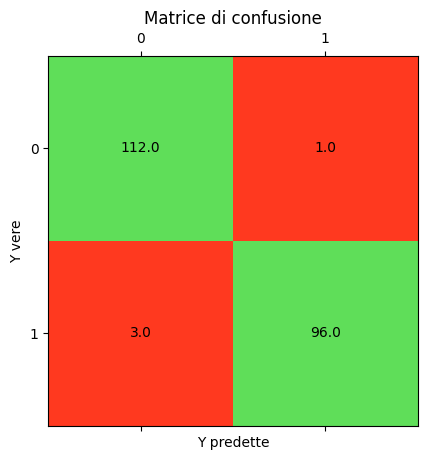

In [ ]:
# Matrice di confusione
from sklearn.metrics import confusion_matrix
import matplotlib.patches as patches
colors = np.array([["#5fde59", "#ff391f"], ["#ff391f", "#5fde59"]])

def plotCm(data):
    fig1, ax1 = plt.subplots()
    ax1.matshow(data)
    for(i,j),z in np.ndenumerate(data):
      color = colors[i, j]
      rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, facecolor=color)
      ax1.add_patch(rect)
      ax1.text(j,i, '{:0.1f}'.format(z), ha='center', va='center', color ='black')
    plt.title("Matrice di confusione")
    plt.xlabel("Y predette")
    plt.ylabel("Y vere")
    plt.show()

confMatrixDT = confusion_matrix(YtestClass, YpredDT)
plotCm(confMatrixDT)


# 3. Logistic Regression

## Implementazione Regressione logistica  

La regressione logistica è un modello che predice la probabilità che una determinata variabile assuma uno dei valori binari zero o uno. Viene usata nei problemi di classificazione introducendo una soglia (di solito si utilizza la soglia di 0.5) e assegnando ai vari campioni l'etichetta 1 per una probabilità maggiore di 0.5, 0 altrimenti.  

La regressione logistica utilizza la **funzione sigmoide** come funzione di attivazione per trasformare una combinazione lineare delle variabili di input in una probabilità (mappa qualsiasi valore reale in un intervallo tra 0 e 1):
$$
sigmoid(z) = \frac{1}{1+e^{-z}}
$$

Il valore z è la combinazione lineare delle features di input e dei pesi w. La funzione logistica  è infatti la seguente:
$$
h_w(x)= Logistic(w⋅x) = \frac{1}{1+e^{-w⋅x}}
$$
con:
- $X$ = matrice delle features
- $w$ = pesi, ovvero i coefficienti associati a ciascuna feature di input e aggiornati durante l'addestramento del modello usando la discesa del gradiente.  

Per la regressione logistica la funzione di costo da minimizzare con la discesa del gradiente è la log-loss o **binary cross-entropy loss**, funzione che misura l'errore tra le predizioni del modello e le etichette binarie reali (0 o 1). La formula di aggiornamento dei pesi è la seguente:
$$
w := w - α[(h_w(x) - y) x +λw]
$$
con:  
- $(h_w(x) - y) x$ = gradiente della funzione di costo rispetto ai pesi, indica la direzione e l'entità dell'aggiornamento necessario per i parametri per ridurre la loss function   
- α = learning rate
- λ = parametro della regolarizzazione L2

Per far adattare meglio il modello ai dati ho inserito il termine di bias.

Durante il training, il modello cerca di minimizzare la differenza tra le predizioni e i valori reali, aggiornando i pesi e il bias iterativamente utilizzando la discesa del gradiente.
Alla fine del processo di addestramento il modello è in grado di fare predizioni sui nuovi dati del Test set, trasformando le combinazioni lineari di input in classi binarie.



In [ ]:
# Definizione della classe per il modello di regressione logistica
def sigmoid(z):
     z=np.clip(z,-600,600) # ho limito i valori di z per evitare l'overflow
     return 1 / (1 + np.exp(-z))

class MyLogisticRegression:

    def __init__(self,lr, l2, numIters):
        self.lr = lr # learning rate
        self.l2 = l2 # regolarizzazione Ridge
        self.numIters = numIters # numero di iterazioni
        self.weights = None
        self.bias = None

    def training(self, X, y):
        numFeatures = X.shape[1] # salvo il numero di features
        self.weights = np.zeros(numFeatures) # inizializzo i pesi a zero
        self.bias = 0

        # Discesa del gradiente:
        for _ in range(self.numIters):
          # Calcolo della funzione logistica h_w: prodotto scalare w⋅X più il bias, a cui applico la funzione sigmoide per trasformare le predizioni lineari in probabilità
          h_w = sigmoid(np.dot(X, self.weights)+self.bias)

          # Calcolo del gradiente
          grad = 1 / numFeatures * np.dot(X.T, (h_w - y))
          db = 1 / numFeatures * sum(h_w - y)

          # Aggiorno pesi e bias con learning rate e gradiente calcolato
          self.weights -= self.lr * (grad + (self.l2/ numFeatures)*self.weights)
          self.bias -= self.lr * db

    def predict(self, X):
        # Prodotto scalare X⋅pesi più bias
        linearPred = np.dot(X, self.weights)+self.bias
        # Applico la sigmoide
        probPred = sigmoid(linearPred)
        # Trasformo le probabilità in classi binarie
        classPred = [0 if y <= 0.5 else 1 for y in probPred]
        return np.array(classPred)


## Scelta degli iperparametri
Per la regressione logistica, gli iperparametri che ho valutato per massimizzare l'Accuracy sono:
- **Il parametro L2 per la regolarizzazione Ridge**: la regolarizzazione L2 penalizza i grandi coefficienti nel modello per prevenire l'overfitting (rende meno sensibile il modello a piccoli cambiamenti nei dati di addestramento). Questo tipo di regolarizzazione è utile quando si hanno molte variabili altamente correlate tra loro. Per quanto riguarda il nostro dataset, come si può vedere dalla matrice di correlazione delle variabili indipendenti riportata sotto, ci sono alcune caselle gialle (valore di correlazione inferiore a -0.75) e alcune caselle blu scuro (valore di correlazione maggiore di 0.75). Non emergono quindi particolari criticità, ma applicare la regolarizzazione Ridge può portare ad un modello più preciso.  
- **Il Learning rate**: è un iperparametro che determina la dimensione dei passi che il modello compie nell'aggiornamento dei parametri durante la discesa del gradiente. Un valore troppo alto può causare un addestramento instabile e portare il modello a non trovare un punto di minimo per la funzione di costo, mentre un valore troppo basso può rallentare la convergenza richiedendo un numero elevato di iterazioni per raggiungere una soluzione accettabile.
- **Il numero di iterazioni in cui il gradient descent aggiorna i parametri del modello**: svolgere troppe poche iterazioni potrebbe portare ad avere un modello troppo poco addestrato (non riesce a minimizzare la funzione di costo in modo soddisfacente). Mentre un numero di iterazioni troppo alto può portare ad overfitting, e ad uno spreco di risorse computazionali senza neanche apportare miglioramenti delle prestazioni.

La combinazione migliore di iperparametri è stata scelta grazie alla Grid Search implementata sopra.

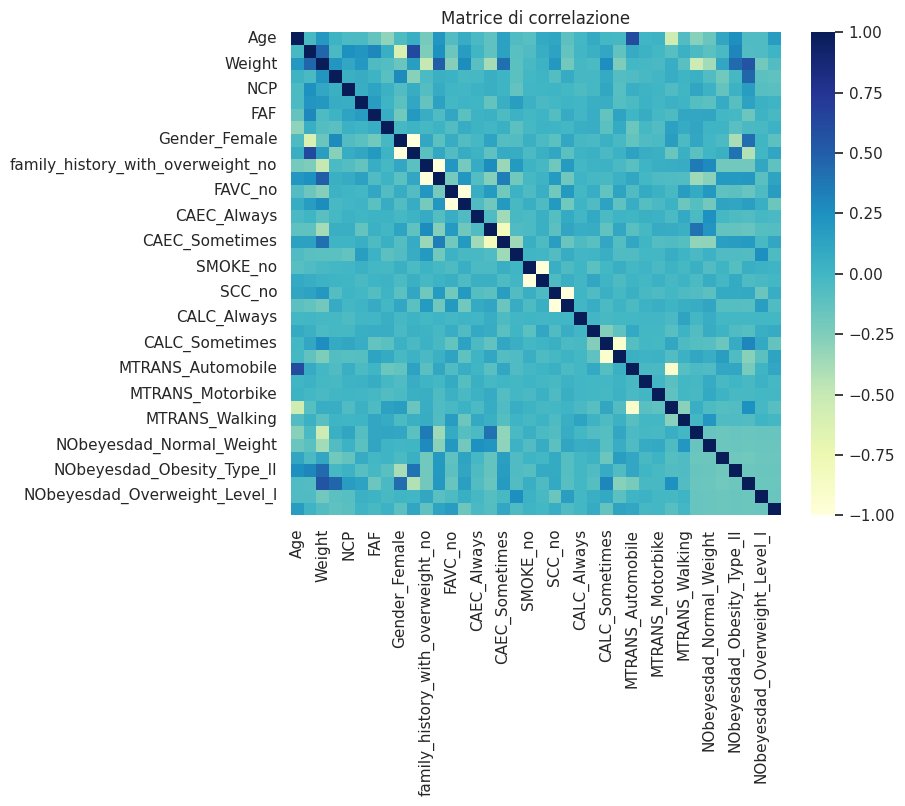

In [ ]:
# Matrice di correlazione
import seaborn as sns; # libreria di Python per la visualizzazione dei dati basata su matplotlib
sns.set_theme()
fig, ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(top=0.8, right=1, hspace=0.5)
plt.title('Matrice di correlazione')
ax = sns.heatmap(dataEncoded.corr(), cmap="YlGnBu", annot=False)


In [ ]:
# Scelta degli iperparametri migliori per la regressione logistica con la grid search
learningRateValues = [10**i for i in range(-3,1)]
numIterationsValues = [10**i for i in range(2,4)]
l2Values = [10**i for i in range(-4,2)]
hyperpLogisticReg = {'Learning Rate':learningRateValues,'l2':l2Values,'NumIteration':numIterationsValues,}
bestHyperpLogisticReg,valAccuraciesLogReg, compilationTimes = gridSearch(MyLogisticRegression,hyperpLogisticReg,XtrainingClass,YtrainingClass,XvalidationClass,YvalidationClass, True)
bestLrLogisticReg = bestHyperpLogisticReg[0]
bestL2LogisticReg = bestHyperpLogisticReg[1]
bestNumIterationsLogisticReg = bestHyperpLogisticReg[2]

print("\nLa scelta migliore per gli iperparametri:")
print(" Learning Rate :",bestLrLogisticReg)
print(" L2: ", bestL2LogisticReg)
print(" Numero iterazioni: ",bestNumIterationsLogisticReg)

Iperparametri: Learning Rate=0.001, l2=0.0001, NumIteration=100	  Accuracy: 0.7263157894736842
Iperparametri: Learning Rate=0.001, l2=0.0001, NumIteration=1000	  Accuracy: 0.7657894736842106
Iperparametri: Learning Rate=0.001, l2=0.001, NumIteration=100	  Accuracy: 0.6447368421052632
Iperparametri: Learning Rate=0.001, l2=0.001, NumIteration=1000	  Accuracy: 0.7789473684210526
Iperparametri: Learning Rate=0.001, l2=0.01, NumIteration=100	  Accuracy: 0.43157894736842106
Iperparametri: Learning Rate=0.001, l2=0.01, NumIteration=1000	  Accuracy: 0.6394736842105263
Iperparametri: Learning Rate=0.001, l2=0.1, NumIteration=100	  Accuracy: 0.4394736842105263
Iperparametri: Learning Rate=0.001, l2=0.1, NumIteration=1000	  Accuracy: 0.5868421052631579
Iperparametri: Learning Rate=0.001, l2=1, NumIteration=100	  Accuracy: 0.5473684210526316
Iperparametri: Learning Rate=0.001, l2=1, NumIteration=1000	  Accuracy: 0.6605263157894737
Iperparametri: Learning Rate=0.001, l2=10, NumIteration=100	  Accu

## Metriche di valutazione  
Anche per la regressione logistica ho valutato le tre metriche:
- **Accuracy**: ho ottenuto una accuratezza inferiore a quella di sklearn,
- **Precision**: risulta essere abbastanza buona
- **Recall**: è molto più bassa del modello di sklearn, il mio modello non riesce ad indentificare correttamente molti campioni positivi, come si può vedere dalla matrice di confusione (sotto) c'è un alto numero di falsi negativi (in basso a sinistra nella matrice).   

Per migliorare il modello ho normalizzato il dataset in modo da avere features con ordini di grandezza uguali. I valori di tutte e tre le metriche sono migliorati, e anche la matrice di confusione (la seconda è quella migliorata).  

Nonostante questa modifica i valori delle metriche rimangono più bassi di quelli di Scikit-learn, per migliorare ancora di più il modello potrebbe essere utile eseguire una feature selection per eliminare le features meno importanti e ridurre la complessità del modello e utilizzare la cross-validation per valutare le performance del modello su più fold del dataset.

In [ ]:
from sklearn.metrics import accuracy_score

# Mio modello NON normalizzato
modelLogR = MyLogisticRegression(lr=bestLrLogisticReg,l2=bestL2LogisticReg, numIters=bestNumIterationsLogisticReg)
modelLogR.training(XtrainingClass,YtrainingClass)
YpredLogR = modelLogR.predict(XtestClass)
#Accuracy
accLogR =  accuracy_score(YtestClass, YpredLogR)
#Recall
recLogR = recall_score(YtestClass, YpredLogR)
#Precision
precLogR = precision_score(YtestClass, YpredLogR)
print(f"Il mio modello di Logistic Regression con dati NON normalizzati, numero di iterazioni = {bestNumIterationsLogisticReg}, learning rate = {bestLrLogisticReg}, L2 = {bestL2LogisticReg} ha:\n Accuracy di {accLogR},\n Precision di {precLogR},\n Recall di {recLogR}\n")


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Modello SKLEARN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # normalizzo i dati
    ('logreg', LogisticRegression(max_iter=bestNumIterationsLogisticReg))
])

modelLogRSklearn = LogisticRegression(max_iter=bestNumIterationsLogisticReg)
pipeline.fit(XtrainingClass,YtrainingClass)
YpredLogRSklearn = pipeline.predict(XtestClass)

#Accuracy
accuracyLogRSklearn = accuracy_score(YtestClass, YpredLogRSklearn)
#Recall
recallLogRSklearn = recall_score(YtestClass, YpredLogRSklearn)
#Precision
precisionLogRSklearn = precision_score(YtestClass, YpredLogRSklearn)
print(f"Logistic Regression Sklearn con numero di iterazioni = {bestNumIterationsLogisticReg} ha:\n Accuracy di {accuracyLogRSklearn},\n Precision di {precisionLogRSklearn},\n Recall di {recallLogRSklearn}")

Il mio modello di Logistic Regression con dati NON normalizzati, numero di iterazioni = 100, learning rate = 0.01, L2 = 0.001 ha:
 Accuracy di 0.8160377358490566,
 Precision di 0.8260869565217391,
 Recall di 0.7676767676767676

Logistic Regression Sklearn con numero di iterazioni = 100 ha:
 Accuracy di 0.9764150943396226,
 Precision di 0.9607843137254902,
 Recall di 0.98989898989899


In [ ]:
#Versione con normalizzazione

# Scelta dei parametri con gridSearch
learningRateValues = [10**i for i in range(-3,1)]
numIterationsValues = [10**i for i in range(2,4)]
l2Values = [10**i for i in range(-4,2)]
hyperpLogisticReg = {'Learning Rate':learningRateValues,'l2':l2Values,'NumIteration':numIterationsValues,}
bestHyperpLogisticRegN, valAccuraciesLogRegN, compilationTimes = gridSearch(MyLogisticRegression,hyperpLogisticReg,XtrainingClassN,YtrainingClassN,XvalidationClassN,YvalidationClass, True)
bestLrLogisticRegN = bestHyperpLogisticRegN[0]
bestL2LogisticRegN = bestHyperpLogisticRegN[1]
bestNumIterationsLogisticRegN = bestHyperpLogisticRegN[2]

print("\nLa scelta migliore per gli iperparametri:")
print(" Learning Rate :",bestLrLogisticRegN)
print(" L2: ", bestL2LogisticRegN)
print(" Numero iterazioni: ",bestNumIterationsLogisticRegN)

# Mio modello con dati normalizzati
modelLogRN = MyLogisticRegression(lr=bestLrLogisticRegN, l2=bestL2LogisticRegN, numIters=bestNumIterationsLogisticRegN)
modelLogRN.training(XtrainingClassN,YtrainingClassN)
YpredLogRN = modelLogRN.predict(XtestClassN)
#Accuracy
accLogRN =  accuracy_score(YtestClass, YpredLogRN)
#Recall
recLogRN = recall_score(YtestClass, YpredLogRN)
#Precision
precLogRN = precision_score(YtestClass, YpredLogRN)
print(f"\nIl mio modello di Logistic Regression con dati normalizzati, numero di iterazioni = {bestNumIterationsLogisticRegN}, learning rate = {bestLrLogisticRegN}, L2 = {bestL2LogisticRegN} ha:\n Accuracy di {accLogRN},\n Precision di {precLogRN},\n Recall di {recLogRN}")

Iperparametri: Learning Rate=0.001, l2=0.0001, NumIteration=100	  Accuracy: 0.8710526315789474
Iperparametri: Learning Rate=0.001, l2=0.0001, NumIteration=1000	  Accuracy: 0.8947368421052632
Iperparametri: Learning Rate=0.001, l2=0.001, NumIteration=100	  Accuracy: 0.8710526315789474
Iperparametri: Learning Rate=0.001, l2=0.001, NumIteration=1000	  Accuracy: 0.8947368421052632
Iperparametri: Learning Rate=0.001, l2=0.01, NumIteration=100	  Accuracy: 0.8710526315789474
Iperparametri: Learning Rate=0.001, l2=0.01, NumIteration=1000	  Accuracy: 0.8947368421052632
Iperparametri: Learning Rate=0.001, l2=0.1, NumIteration=100	  Accuracy: 0.8710526315789474
Iperparametri: Learning Rate=0.001, l2=0.1, NumIteration=1000	  Accuracy: 0.8947368421052632
Iperparametri: Learning Rate=0.001, l2=1, NumIteration=100	  Accuracy: 0.8710526315789474
Iperparametri: Learning Rate=0.001, l2=1, NumIteration=1000	  Accuracy: 0.8921052631578947
Iperparametri: Learning Rate=0.001, l2=10, NumIteration=100	  Accur

**Matrice di confusione**


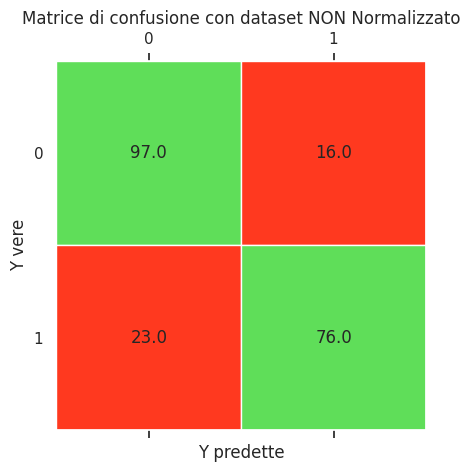

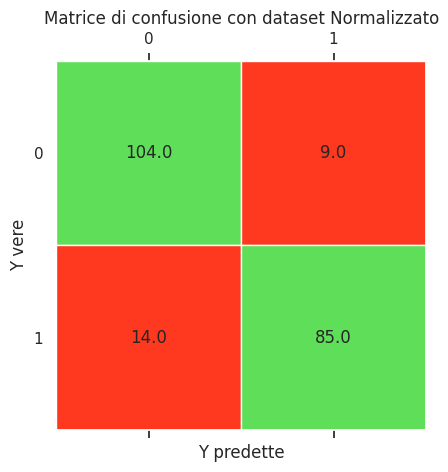

In [ ]:
# Matrice di confusione
import matplotlib.patches as patches
colors = np.array([["#5fde59", "#ff391f"], ["#ff391f", "#5fde59"]])
def plotCm(data,n=False):
    fig2, ax2 = plt.subplots()
    ax2.matshow(data)
    for(i,j),z in np.ndenumerate(data):
      color = colors[i, j]
      rect = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, facecolor=color)
      ax2.add_patch(rect)
      ax2.text(j,i, '{:0.1f}'.format(z), ha='center', va='center')
    if(n):
      plt.title("Matrice di confusione con dataset Normalizzato")
    else:
      plt.title("Matrice di confusione con dataset NON Normalizzato")
    plt.xlabel("Y predette")
    plt.ylabel("Y vere")
    plt.show()

confMatrixLogReg = confusion_matrix(YtestClass, YpredLogR)
plotCm(confMatrixLogReg)
confMatrixLogRegN = confusion_matrix(YtestClass, YpredLogRN)
plotCm(confMatrixLogRegN,n=True)

# 4. K-Nearest Neighbors (KNN)


## Implementazione KNN

Tecnica di classificazione che dato un nuovo campione predice a quale classe appartiene valutando la sua distanza dai campioni già classificati.  

Nella **fase di training** il modello memorizza l'intero dataset di addestramento.  
Nella **fase di test** quando viene presentato un nuovo campione (tra gli Xtest) da classificare, il modello calcola le distanze di quel campione dagli altri per individuare i k campioni di training più vicini e lo classifica con la classe più comune tra quei k campioni.  

Per calcolare la distanza tra i campioni del Test set e quelli già classificati ho utilizzato la **distanza di Minkowski**:  
$$
Distanza\ di\ Minkowski = L^p(x_j,x_q) = \Big (\sum \limits_{i} |x_{j,i}-x_{q,i}|^p \Big)^{\frac{1}{p}}
$$
con:  
- $x_j$ = campione j-esimo del Training Set  
- $x_q$ = campione del Test set da valutare  
- $x_j,i$ e $x_q,i$ = i-esima feature del campione j-esimo e del campione di test  
- $p$ = parametro che definisce il tipo di distanza, in particolare ho valutato:  
    - Distanza di Manhattan con p = 1  
    - Distanza Euclidea con p = 2  

Per rendere l'algoritmo più veloce e diminuire il tempo di esecuzione ho implementato la versione vettorizzata del calcolo della distanza tra i campioni del Test set e quelli del Training set utilizzando le operazioni vettoriali di NumPy.

In [ ]:
# Definisco la classe KNN per la classificazione con K-Nearest Neighbors
class KNN:
    # Costruttore della classe
    def __init__(self, k, p):   #di base metto p=2, distanza euclidea
        self.k = k # Numero di vicini da considerare
        self.p = p

    # Funzione per addestrare il modello
    def training(self, Xtraining, Ytraining):
        self.Xtraining = Xtraining
        self.Ytraining = Ytraining

    # Funzione per predire la classe di un campione
    def predict(self, Xtest):
        Ypred = [self._predict(X) for X in Xtest]
        return np.array(Ypred)

    def _predict(self, Xtest):
        # Calcolo le distanze tra Xtest e tutti i campioni di training (Xtraining) in modo vettoriale
        # ord specifica l'ordine della norma da calcolare,
        # se ord=1 calcola la somma dei valori assoluti degli elementi della matrice (Distanza di Manhattan)
        # se ord=2 calcola la radice quadrata della somma dei quadrati degli elementi della matrice (Distanza Euclidea)
        # axis = 1 per calcolare la norma lungo le righe
        distances = np.linalg.norm(self.Xtraining - Xtest, axis=1, ord=self.p)

        # Ordino gli indici dei campioni di training in base alla distanza crescente
        kIndices = np.argsort(distances)[:self.k]
        # Identifico le classi dei k campioni più vicini
        kNearestLabels = [self.Ytraining[i] for i in kIndices]
        # Ritorno la classe più comune
        mostCommon = Counter(kNearestLabels).most_common()
        return mostCommon[0][0]




## Scelta degli iperparametri   
Per il KNN ho valutato i seguenti iperparametri:
- **Iperparametro k**: numero di osservazioni più vicine al campione di test che voglio classificare.  
La scelta del k influisce sul trade-off tra bias e varianza. Un k troppo piccolo potrebbe portare il modello ad adattarsi troppo ai dati di addestramento (alta varianza) portando ad overfitting, quindi scarsa capacità di generalizzazione. Ma se k è troppo grande si prende in considerazione una porzione troppo grande del dataset (alto bias) portando ad un modello troppo semplice, e all'underfitting.  
Valutando l'andamento dell'Accuracy al variare del valore di k sul Validation set, ho notato che nel mio modello le prestazioni peggiorano all'aumentare di k, e spesso viene scelto 1 come valore di k migliore. Questo è un comportamento atteso, come detto prima per k alti (k=50 o 70) il modello va in underfitting perchè prende in considerazione troppi vicini.  
- **Calcolo della distanza**: ho scelto quella tra Euclidea e Manhattan che restituiva Accuracy più alta testando il modello sul Validation set, anche se come si può vedere dal grafico l'Accuracy è molto simile per entrambe le distanze.  


Accuracy con k=1 e distanza di Manhattan:  0.9842105263157894
Accuracy con k=1 e distanza Euclidea:  0.9789473684210527
Accuracy con k=3 e distanza di Manhattan:  0.9815789473684211
Accuracy con k=3 e distanza Euclidea:  0.9736842105263158
Accuracy con k=5 e distanza di Manhattan:  0.9657894736842105
Accuracy con k=5 e distanza Euclidea:  0.9552631578947368
Accuracy con k=7 e distanza di Manhattan:  0.9605263157894737
Accuracy con k=7 e distanza Euclidea:  0.9578947368421052
Accuracy con k=10 e distanza di Manhattan:  0.9605263157894737
Accuracy con k=10 e distanza Euclidea:  0.9526315789473684
Accuracy con k=50 e distanza di Manhattan:  0.9236842105263158
Accuracy con k=50 e distanza Euclidea:  0.9210526315789473
Accuracy con k=70 e distanza di Manhattan:  0.9263157894736842
Accuracy con k=70 e distanza Euclidea:  0.9078947368421053


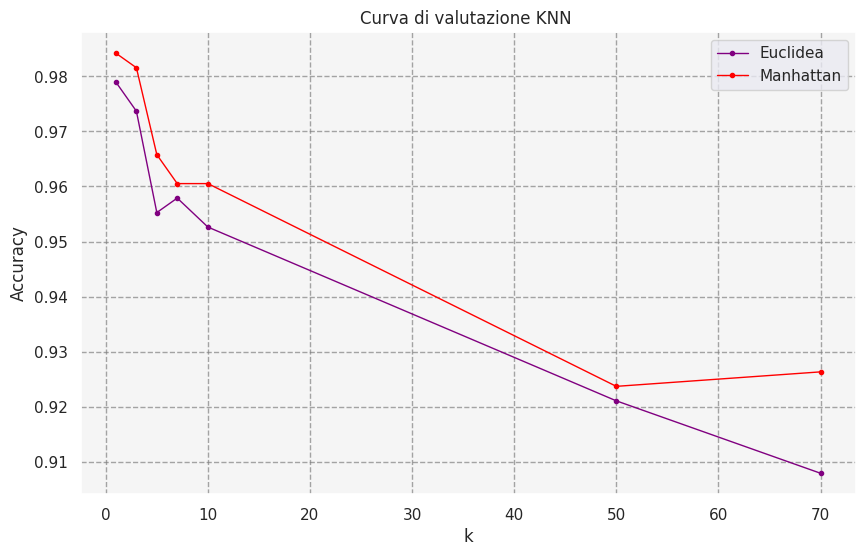

La scelta migliore per il k con distanza di Manhattan è: 1, con accuratezza = 0.9842105263157894
La scelta migliore per il k con distanza Euclidea è: 1, con accuratezza = 0.9789473684210527
Per calcolare la distanza ho scelto: distanza di Manhattan


In [ ]:
from sklearn.metrics import accuracy_score
kValues=[1,3,5,7,10,50,70]
valAccuraciesEucl = []
valAccuraciesManh = []
bestAccManh = 0
bestAccEucl = 0

for i in kValues:
    #Valutazione distanza Manhattan
    model = KNN(k=i, p=1)
    model.training(XtrainingClass, YtrainingClass)
    YpredValidManh = model.predict(XvalidationClass)
    #Calcolo Accuracy
    accKnnValidManh = accuracy_score(YvalidationClass, YpredValidManh)
    valAccuraciesManh.append(accKnnValidManh)
    print(f"Accuracy con k={i} e distanza di Manhattan: ",accKnnValidManh)

    #Valutazione distanza Euclidea
    model = KNN(k=i, p=2)
    model.training(XtrainingClass, YtrainingClass)
    YpredValidEucl = model.predict(XvalidationClass)
    #Calcolo Accuracy
    accKnnValidEucl = accuracy_score(YvalidationClass, YpredValidEucl)
    valAccuraciesEucl.append(accKnnValidEucl)
    print(f"Accuracy con k={i} e distanza Euclidea: ",accKnnValidEucl)

plt.figure(figsize=(10, 6))
# Tracciamento della curva di valutazione per distanza Euclidea
plt.plot(kValues, valAccuraciesEucl, color='purple', marker='o', linestyle='-', linewidth=1, markersize=3, label='Euclidea')
#Tracciamento della curva di valutazione per distanza Manhattan
plt.plot(kValues, valAccuraciesManh , color='red', marker='o', linestyle='-', linewidth=1, markersize=3, label='Manhattan')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Curva di valutazione KNN ')
plt.gca().set_facecolor('whitesmoke')
plt.grid(True, linestyle='--',alpha=0.7, color='gray')
plt.legend()
plt.show()

# Selezione del migliore k per entrambe le distanze
for i in range(len(kValues)):
  if valAccuraciesEucl[i]>bestAccEucl:
    bestAccEucl = valAccuraciesEucl[i]
    bestKEucl = kValues[i]
  if valAccuraciesManh[i]>bestAccManh:
    bestAccManh = valAccuraciesManh[i]
    bestKManh = kValues[i]

if bestAccManh>=bestAccEucl:
  bestDistance = 'distanza di Manhattan'
  bestP = 1
  bestK = bestKManh
else:
  bestDistance = 'distanza Euclidea'
  bestP = 2
  bestK = bestKEucl

print(f'La scelta migliore per il k con distanza di Manhattan è: {bestKManh}, con accuratezza = {bestAccManh}')
print(f'La scelta migliore per il k con distanza Euclidea è: {bestKEucl}, con accuratezza = {bestAccEucl}')
print(f'Per calcolare la distanza ho scelto: {bestDistance}')

## Metriche di valutazione   

Confrontando l'Accuracy ottenuta dal mio modello con quello di Scikit-learn ho ottenuto valori quasi identici, indice che il mio modello ha una implementazione corretta.

In [ ]:
#Mio modello
modelKnn = KNN(k=bestK, p = bestP ) # chiamo costruttore della classe KNN con il k e la distanza scelti
modelKnn.training(XtrainingClass, YtrainingClass)
YpredKnn = modelKnn.predict(XtestClass)
#Accuracy
accKnn = np.sum(YpredKnn == YtestClass) / len(YtestClass)
#Recall
recKnn = recall_score(YtestClass, YpredKnn)
#Precision
precKnn = precision_score(YtestClass, YpredKnn)
print(f"Il mio modello di Knn con k={bestK} con {bestDistance} ha accuratezza = {accKnn}, precision = {precKnn}, recall = {recKnn}")

#Sklearn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

if modelKnn.p==2:
  metr = 'euclidean'
else:
  metr = 'manhattan'

modelKnnSklearn = KNeighborsClassifier(n_neighbors=bestK,metric = metr)
modelKnnSklearn.fit(XtrainingClass, YtrainingClass)
YpredKnnSklearn = modelKnnSklearn.predict(XtestClass)
#Accuracy
accKnnSklearn = accuracy_score(YtestClass, YpredKnnSklearn)
#Recall
recKnnSklearn = recall_score(YtestClass, YpredKnnSklearn)
#Precision
precKnnSklearn = precision_score(YtestClass, YpredKnnSklearn)
print(f"Il modello di Knn con Scikit-learn con k={bestK} con {bestDistance} ha accuratezza = {accKnnSklearn}, precision = {precKnnSklearn}, recall = {recKnnSklearn}")


Il mio modello di Knn con k=1 con distanza di Manhattan ha accuratezza = 0.9858490566037735, precision = 0.98, recall = 0.98989898989899
Il modello di Knn con Scikit-learn con k=1 con distanza di Manhattan ha accuratezza = 0.9858490566037735, precision = 0.98, recall = 0.98989898989899


# 5. Neural Network

**Manipolazione dei dati**

In [ ]:
#Creo la variabile X delle variabili indipendenti, le nostre features (per il training, per il test e validation) selezionando tutte le colonne tranne Weight
XtrainingNN = trainingSetNN.drop(columns=['Weight']).values
XtestNN = testSetNN.drop(columns=['Weight']).values
XvalidationNN = validationSetNN.drop(columns=['Weight']).values

#Creo la variabile Y, della variabile dipendente ovvero il target (per il training, per il test e validation) selezionando solo la colonna Weight
YtestNN = testSetNN['Weight'].values
YtrainingNN = trainingSetNN['Weight'].values
YvalidationNN = validationSetNN['Weight'].values

# Trasformo vettori riga in vettori colonna
YtrainingNN = YtrainingNN.reshape(-1,1)
YtestNN = YtestNN.reshape(-1,1)
YvalidationNN = YvalidationNN.reshape(-1,1)

## Implementazione Rete Neurale  
Ho implementato un modello di rete neurale feed-forward (l'output di ogni layer è l'input del successivo) con un numero variabile di hidden layer, ognuno contenente un numero variabile di neuroni.

Nella classe NeuralNetwork ho implementato i metodi per:

- **Inizializzare i layers**:
Nelle reti neurali è molto importante inizializzare i pesi di ogni layer che sono il punto di partenza per l'ottimizzazione (discesa del gradiente) e possono influenzare di molto il risultato finale. L'algoritmo di discesa del gradiente potrebbe infatti rimanere bloccato in un punto di minimo subottimo, o non convergere proprio.
Ho quindi inzializzato i pesi estraendo valori casuali dalla distribuzione normale $N(0, 0.01)$ con media zero e deviazione standard molto piccola. Questa soluzione garantisce che i neuroni di un layer non siano identici e possano apprendere dai dati caratteristiche diverse.
Ho inizializzato anche il vettore del bias ad 1 per avere dei neuroni inizialmente attivi, e per evitare che i neuroni producano sempre zero in output avendo usato la funzione di attivazione ReLu.

- **Fase di Forward**:
Propaga l'input della rete neurale attraverso ogni layer applicando i pesi, il bias e la funzione di attivazione per calcolare l'output dei vari layer e quello finale.
  Per introdurre la non linearità nella rete e permettere al modello di apprendere le relazioni complesse nei dati ho scelto come funzione di attivazione la <u>ReLu</u> che ho applicato a tutti i layer tranne l'ultimo:
  $$
  ReLu(x) = max(0,x)
  $$

- **Fase di Backpropagation**: Durante il training del modello con la backpropagation vengono aggiornati i pesi e i bias in modo da minimizzare la loss function.    
  -> Come loss function ho utilizzato il <u>Mean Squared Error</u>:
  $$
  J(w) = \frac{1}{2}\sum \limits_{d∈D} \sum \limits_{k∈O} (t_{kd} -o_{kd})^2
  $$
     con:  
    - D = dataset di training
    - O = insieme degli output della rete
    - $t_{kd}$ = k-esimo output per il dato d  
    - $o_{kd}$ = k-esimo output predetto dalla rete per il dato d  
    
  -> Per minimizzare la loss function ho scelto la <u>Mini-Batch gradient descent</u> che calcola il gradiente e aggiorna i pesi su piccoli batch di addestramento (e non su tutti i campioni). I pesi vengono aggiornati sottraendo una frazione (determinata dal learning rate) del gradiente della funzione di costo:
  $$
  \vec{w}_{(t+1)} := \vec{w}_{(t)} - α ∇_{\vec{w}}J(\vec{w})
  $$
  con:  
    - α = learning rate (determina in che direazione e quanto i pesi dovrebbero essere modificati per ridurre l'errore)
    - $∇_{\vec{w}}J(\vec{w})$ = gradiente della funzione di costo
    
  -> Per calcolare il gradiente si parte dal layer di output e si procede a ritroso verso i layer interni, in modo da tenere in conto di come gli errori nei nodi successivi influenzano l'errore nel nodo corrente. Il gradiente della funzione di loss rispetto all'output del layer $i$ ($δ_i$) è:  
    Per i nodi in output: $δ_i = -(t_i-o_i)$  
    Per i nodi interni:   
  $$
  δ_i =f'(z_i)\sum \limits_{k}δ_k w_{ki}
  $$  
  con:  
  - $f'(z_i)$ = derivata della funzione di attivazione (ReLu) rispetto all'output del layer i   
  - $δ_k w_{ki}$ = rappresenta l'influenza dei nodi del layer successivo sul nodo $i$, ogni contributo dipende dal peso che collega il nodo $i$ al nodo $k$ del layer successivo moltiplicato per il gradiente di $k$  
- **Training del modello**: Con i passaggi di forward e backpropagation.  
- **Predict**: Ho utilizzato il metodo forward per valutare gli output ottenuti dalla mia rete con input Xtest.  

In [ ]:
from statistics import mean

def mse(actual, predicted):
    return (actual - predicted) ** 2

def MyReLu(input):
    return np.maximum(input, 0)

#Derivata funzione di attivazione
def reluDerivative(x):
  return np.where(x>0, 1, 0)

class NeuralNetwork:

    def __init__(self, lr, batchSize, epochs, numNeurons, hiddenLayers):
        self.lr = lr
        self.batchSize = batchSize
        self.epochs = epochs
        self.numNeurons = numNeurons
        self.hiddenLayers = hiddenLayers

        # Creo un array con [numero di features in input, numero di neuroni (ripetuto tante volte quanti sono gli hidden layer), numero di features in output]
        inputConf = [XtrainingNN.shape[1]]
        for i in range(self.hiddenLayers):
            inputConf.append(self.numNeurons)
        inputConf.append(1) # numero di features in output
        self.layers = self.initLayers(inputConf)

    # Addestramento della rete neurale
    def training(self,X,Y):
        for epoch in range(self.epochs):
            epochLoss = []
            for i in range(0, X.shape[0], self.batchSize):
                Xbatch = X[i:(i+self.batchSize)] # prendo un batch di dimensione batchSize
                Ybatch = Y[i:(i+self.batchSize)]
                pred, hidden = self.forward(Xbatch)
                # Gradiente della funzione di loss rispetto all'output dell'ultimo layer [−(t_i−o_i)]
                grad = pred - Ybatch
                self.layers = self.backward(hidden, grad)

    #Inizializzo pesi e bias per ciascun layer
    def initLayers(self,inputs):
        layers = []
        #
        for i in range(1, len(inputs)): #per ogni componente di inputConf
            weights = np.random.normal(0, 0.01, (inputs[i-1], inputs[i])) # inizializzo matrice dei pesi con distribuzione normale N(0, 0.01)
            bias = np.ones((1, inputs[i]))  # bias inizializzati a 1
            layers.append([weights, bias])
        return layers

    #Calcolo dell'output della rete neurale tramite passaggio Forward
    def forward(self, pred): #pred = input iniziale
        hidden = [pred.copy()] # output dei layer nascosti
        for i in range(len(self.layers)):
            #Calcolo l'output di uno strato: output = input * weights + bias
            pred = np.dot(pred, self.layers[i][0]) + self.layers[i][1] #layers[i][0] sono i pesi, layers[i][1] è il bias
            # Applico funzione di attivazione ReLu se il layer corrente non è l'ultimo
            if i < len(self.layers) - 1:
                pred = MyReLu(pred)
            #Salvo il valore intermedio del layer corrente
            hidden.append(pred.copy())

        return pred, hidden

    # Aggiorno i pesi e il bias tramite backpropagation
    def backward(self, hidden, grad):

        # Per ogni layer partendo dall'ultimo
        for i in range(len(self.layers)-1, -1, -1):

            #Calcolo il gradiente per i nodi interni (il layer corrente non è l'ultimo)
            if i != len(self.layers) - 1:
                #Se sono in un nodo interno calcolo la derivata della funzione di attivazione rispetto all'output del layer precedente
                grad = grad * reluDerivative(hidden[i+1]) # gradiente moltiplicato per la derivata della ReLu

            # Calcolo del gradiente della funzione di loss rispetto ai pesi per il layer corrente
            w_grad = np.dot(hidden[i].T, grad) #moltiplico output del layer corrente per gradiente nodo successivo

            # Calcolo il gradiente della funzione di loss rispetto ai bias per il layer corrente
            b_grad = np.mean(grad, axis=0) #calcolo la media del gradiente rispetto ai campioni del batch

            # Discesa del gradiente (aggiorno valori pesi e bias)
            self.layers[i][0] -= w_grad * self.lr  # layers[i][0] è il vettore dei pesi del layer corrente
            self.layers[i][1] -= b_grad * self.lr  # layers[i][1] è il vettore del bias del layer corrente

            # Propago il gradiente al layer precedente attraverso i pesi del layer corrente
            grad = np.dot(grad, self.layers[i][0].T) #layers[i][0] è il vettore dei pesi del livello corrente

        # Restituisco l'elenco dei layers contenente i pesi e i bias aggiornati
        return self.layers

    def predict (self,Xtest):
      output, _ = self.forward(Xtest) #output sarà la predizione finale, i valori intermedi non mi servono nella predizione
      return output


## Scelta degli iperparametri  

1. **Dimensione dei Batch**: numero di campioni che il modello elabora prima di aggiornare i pesi. Scegliendo un batch piccolo le prestazioni migliorano ma aumenta anche il tempo necessario per l'addestramento, diventano infatti necessarie più iterazioni della fase di backpropagation portando ad un consumo maggiore di risorse computazionali. Avendo a disposizione un training set di 1519 campioni ho scelto come dimensioni dei batch alcuni suoi divisori partendo da 7 (nelle prove che ho fatto è la dimensione che porta ad un MSE minore senza portare ad un tempo di elaborazione troppo grande).  
2. **Numero di neuroni**: un numero più elevato di neuroni permette alla rete di apprendere rappresentazioni più complesse e permette di ottenere dei valori di MSE più bassi, tuttavia un numero troppo alto può portare a errori nell'addestramento e a overfitting. Ho provato diversi valori per il numero di neuroni e ho deciso di impostare come valore massimo 15 nella grid Search poichè per valori maggiori l'MSE inizia ad aumentare.  
3. **Numero di layer nascosti**: La rete neurale è il modello computazionalmente più complesso tra quelli che ho implementato. Facendo vari test ho notato che i tempi di esecuzione del modello aumentano con l'aumentare del numero di hidden layer senza migliorare le prestazioni, e in alcuni casi peggiorandole di molto. Inoltre un numero troppo elevato di hidden layer porta al fenomeno dei vanishing o exploding gradients (i valori dei gradienti diventano troppo piccoli o troppo grandi), mi è capitato infatti che con un numero di hidden layer alto (in alcuni casi anche 5 o 6) il vettore dei pesi predetto fosse un array con tutti valori NaN. Ho quindi scelto un intervallo di valori piccoli per il numero di hidden layer nella Grid Search.  
4. **Learning rate**: Ho notato che per far funzionare il modello e per ottenere delle performance migliori è necessario un learning rate molto basso, ho scelto come valore $10^{-6}$.  
5. **Numero di epoche**: nella fase di training il dataset di training viene fornito in input alla rete tante volte quante sono le epoche per migliorare l'accuratezza del modello. Avendo scelto un learning rate molto basso ho dovuto aumentare di molto il numero di epoche, infatti riducendo il learning rate l'aggiornamento dei pesi della rete neurale diventa più lento e il modello richiede più epoche per convergere.  

*Nota*: La gridSearch che testa le performance del mio modello su tante combinazioni di iperparametri (descritte sopra) impiega molto tempo per compilare, ho quindi deciso di mostrare nei primi tre grafici sottostanti come variano le performance al variare di un solo iperparametro. Ho scelto i parametri fissi in modo da evidenziare i comportamenti spiegati ma anche da avere tempi di compilazione abbastanza brevi, in particolare ho scelto un numero di epoche basso (100) che mi permette di avere un minor tempo di compilazione a discapito delle prestazioni (il focus è sull'andamento generale della performance non sulla minimizzazione delle metriche).  

<u>Nei tre grafici seguenti:</u>  
**I.** è visibile come l'MSE aumenta all'aumentare della dimensione dei batch.  
**II.** si mostra come aumentando il numero di neuroni inizialmente l'MSE diminuisce, ma superato un certo valore il modello diventa troppo complesso e l'MSE aumenta.  
**III.** l'ultimo grafico ci fa vedere come il modello ottenga un buon valore di MSE con pochi hidden layer (già per un valore pari a 2). È interessante notare che aumentando il numero di hidden layer l'MSE non varia o diminuisce di poco e già per valori di 6,7 l'MSE e il tempo di compilazione (indicato sopra i punti del grafico) aumentano drasticamente.

Successivamente è presente una esecuzione della gridSearch su poche combinazioni di iperaparametri (quelle che ho valutato essere più performanti per ottenere le prestazioni migliori).

Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 99.3673933421495
Iperparametri: Learning Rate=1e-06, Batch Size=14, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 108.97823751361831
Iperparametri: Learning Rate=1e-06, Batch Size=21, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 105.11515911822852
Iperparametri: Learning Rate=1e-06, Batch Size=28, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 149.7924810247172
Iperparametri: Learning Rate=1e-06, Batch Size=35, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 141.46358106296725
Iperparametri: Learning Rate=1e-06, Batch Size=42, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 147.019014490876
Iperparametri: Learning Rate=1e-06, Batch Size=49, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 180.32668627333712
 Dimensione dei Batch migliore:  7


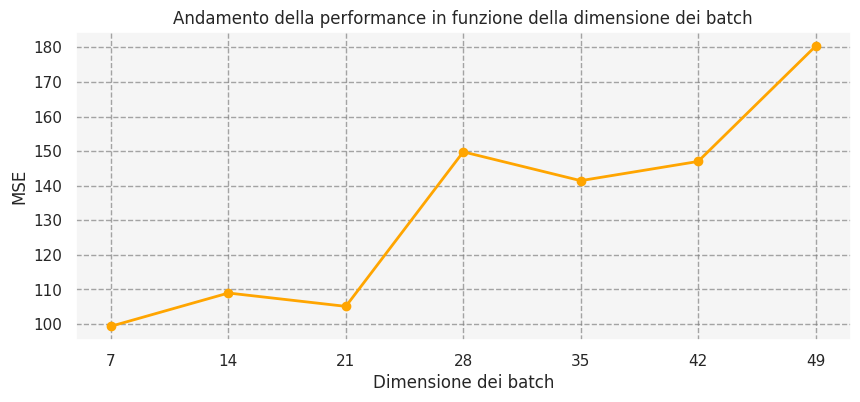

In [ ]:
# Andamento della performance in funzione della dimensione dei batch
learningRateValues = [1e-6]
batchSizeValues = [7,14,21,28,35, 42,49]
epochsValues =[100]
numNeuronsValues = [5]
hiddenLayersValues = [2]
hyperpNN = {'Learning Rate':learningRateValues,'Batch Size':batchSizeValues,'Epochs':epochsValues,'Num Neurons':numNeuronsValues, 'Hidden Layer':hiddenLayersValues}
bestHyperpNN, valMSEBatch,compilationTimes = gridSearch(NeuralNetwork,hyperpNN,XtrainingNN,YtrainingNN,XvalidationNN,YvalidationNN, False)
bestBatchSize= bestHyperpNN[1]

print(" Dimensione dei Batch migliore: ",bestBatchSize)

plt.figure(figsize=(10, 4))
plt.plot(batchSizeValues, valMSEBatch, color='orange', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(batchSizeValues)
plt.xlabel('Dimensione dei batch')
plt.ylabel('MSE')
plt.title('Andamento della performance in funzione della dimensione dei batch')
plt.gca().set_facecolor('whitesmoke')
plt.grid(True, linestyle='--',alpha=0.7, color='gray')
plt.show()

Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=2, Hidden Layer=2	  MSE: 107.91051899784748
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=5, Hidden Layer=2	  MSE: 97.70539543874077
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=2	  MSE: 91.46661399788756
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=15, Hidden Layer=2	  MSE: 91.67192403331059
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=20, Hidden Layer=2	  MSE: 90.29838777556793
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=30, Hidden Layer=2	  MSE: 95.48179952504154
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=40, Hidden Layer=2	  MSE: 98.17401396135541
 Numero di neuroni migliore:  20


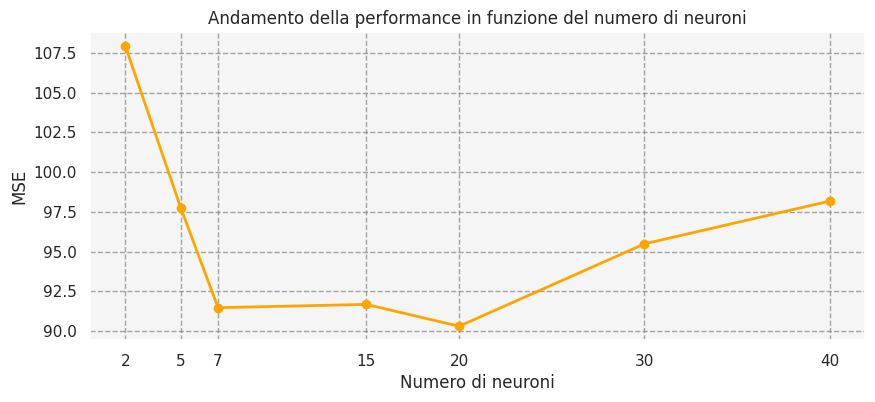

In [ ]:
# Andamento della performance in funzione del numero di neuroni
learningRateValues = [1e-6]
batchSizeValues = [7]
epochsValues =[100]
numNeuronsValues = [2,5,7,15,20,30,40]
hiddenLayersValues = [2]
hyperpNN = {'Learning Rate':learningRateValues,'Batch Size':batchSizeValues,'Epochs':epochsValues,'Num Neurons':numNeuronsValues, 'Hidden Layer':hiddenLayersValues}
bestHyperpNN, valMSENeurons,compilationTimes = gridSearch(NeuralNetwork,hyperpNN,XtrainingNN,YtrainingNN,XvalidationNN,YvalidationNN, False)
bestNumNeurons= bestHyperpNN[3]

print(" Numero di neuroni migliore: ",bestNumNeurons)

plt.figure(figsize=(10, 4))
plt.plot(numNeuronsValues, valMSENeurons, color='orange', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(numNeuronsValues)
plt.xlabel('Numero di neuroni')
plt.ylabel('MSE')
plt.title('Andamento della performance in funzione del numero di neuroni')
plt.gca().set_facecolor('whitesmoke')
plt.grid(True, linestyle='--',alpha=0.7, color='gray')
plt.show()

Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=2	  MSE: 94.84127783333756
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=3	  MSE: 56.42092339795587
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=4	  MSE: 50.47466050337835
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=6	  MSE: 66.64918127270737
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=8	  MSE: 757.1699993910826
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=100, Num Neurons=7, Hidden Layer=9	  MSE: 757.1731048874755
 Numero di layer nascosti migliore:  7


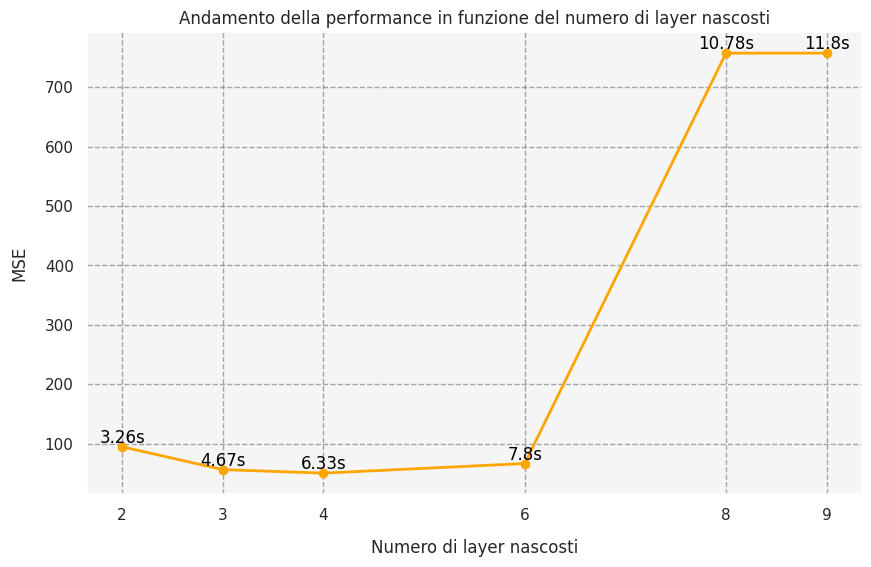

In [ ]:
# Andamento della performance in funzione del numero di layer nascosti
learningRateValues = [1e-6]
batchSizeValues = [7]
epochsValues =[100]
numNeuronsValues = [7]
hiddenLayersValues = [2,3,4,6,8,9]
hyperpNN = {'Learning Rate':learningRateValues,'Batch Size':batchSizeValues,'Epochs':epochsValues,'Num Neurons':numNeuronsValues, 'Hidden Layer':hiddenLayersValues}
bestHyperpNN, valMSEHiddenLayer,compilationTimes = gridSearch(NeuralNetwork,hyperpNN,XtrainingNN,YtrainingNN,XvalidationNN,YvalidationNN, False)
bestNumNeurons= bestHyperpNN[3]

print(" Numero di layer nascosti migliore: ",bestNumNeurons)

plt.figure(figsize=(10, 6))
plt.plot(hiddenLayersValues, valMSEHiddenLayer, color='orange', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.xticks(hiddenLayersValues)
plt.xlabel('Numero di layer nascosti', labelpad=12)
plt.ylabel('MSE', labelpad=12)
plt.title('Andamento della performance in funzione del numero di layer nascosti')

for i in range(len(hiddenLayersValues)):
    plt.text(hiddenLayersValues[i], valMSEHiddenLayer[i], f'{round(compilationTimes[i], 2)}s', ha='center', color='black', va = 'bottom', fontweight='medium')

plt.gca().set_facecolor('whitesmoke')
plt.grid(True, linestyle='--',alpha=0.7, color='gray')
plt.show()

In [ ]:
# Grid Search per la scelta degli iperparametri
learningRateValues = [1e-6]
batchSizeValues = [7]
epochsValues =[1000]
numNeuronsValues = [7,15]
hiddenLayersValues = [2,3]
hyperpNN = {'Learning Rate':learningRateValues,'Batch Size':batchSizeValues,'Epochs':epochsValues,'Num Neurons':numNeuronsValues, 'Hidden Layer':hiddenLayersValues}
bestHyperpNN, valMSE, compilationTimes = gridSearch(NeuralNetwork,hyperpNN,XtrainingNN,YtrainingNN,XvalidationNN,YvalidationNN, False)
bestLrNN= bestHyperpNN[0]
bestBatchSize= bestHyperpNN[1]
bestEpochs= bestHyperpNN[2]
bestNumNeurons= bestHyperpNN[3]
bestHiddenLayers= bestHyperpNN[4]

print("\nLa scelta migliore per gli iperparametri:")
print(" Learning Rate :",bestLrNN)
print(" Dimensione dei Batch: ",bestBatchSize)
print(" Epochs: ", bestEpochs)
print(" Numero di neuroni: ", bestNumNeurons)
print(" Numero di layer nascosti: ",bestHiddenLayers)

Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=1000, Num Neurons=7, Hidden Layer=2	  MSE: 22.58027269927865
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=1000, Num Neurons=7, Hidden Layer=3	  MSE: 21.702112725235708
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=1000, Num Neurons=15, Hidden Layer=2	  MSE: 22.860324139710123
Iperparametri: Learning Rate=1e-06, Batch Size=7, Epochs=1000, Num Neurons=15, Hidden Layer=3	  MSE: 23.43114381969115

La scelta migliore per gli iperparametri:
 Learning Rate : 1e-06
 Dimensione dei Batch:  7
 Epochs:  1000
 Numero di neuroni:  7
 Numero di layer nascosti:  3


##Metriche di valutazione  
Ho calcolato MSE, MAE, RMSE per il mio modello con la migliore combinazione di iperparametri. Ho ottenuto un modello ben funzionante, con delle buone performance, dovute anche alla scelta accurata degli iperparametri.

In [ ]:
def NNmetrics(Ypred, Ytest):
    # Calcolo MSE
    MSE = np.mean((Ytest - Ypred)**2)
    # Calcolo MAE
    MAE = np.mean(np.abs(Ytest - Ypred))
    # Calcolo RMSE
    RMSE = np.sqrt(MSE)
    print("Il mio modello di rete neurale ha ")
    print("MSE: ", MSE)
    print("MAE: ", MAE)
    print("RMSE: ", RMSE,"\n")
    return MSE, MAE, RMSE

# Creo il mio modello di rete neurale
modelNN = NeuralNetwork(lr=bestLrNN, batchSize=bestBatchSize, epochs=bestEpochs, numNeurons=bestNumNeurons, hiddenLayers=bestHiddenLayers)
# Addestramento
modelNN.training(XtrainingNN, YtrainingNN)
# Fase di test
YpredNN = modelNN.predict(XtestNN)
# Calcolo delle metriche di accuratezza
NNmetrics = NNmetrics(YpredNN, YtestNN)

MSENN = NNmetrics[0]
MAENN = NNmetrics[1]
RMSENN = NNmetrics[2]

Il mio modello di rete neurale ha 
MSE:  18.231842168999567
MAE:  3.1850239435017893
RMSE:  4.269876130404671 



# Considerazioni finali
**Algoritmi di regressione:**
Il modello di regressione lineare è più semplice da implementare rispetto al modello di rete neurale, e ha delle performance buone.
La rete neurale ha prestazioni migliori è infatti un modello più complesso (caratterizzato da diversi iperparametri) che offre maggiore flessibilità ed è capace di individuare le relazioni non lineari nei dati. Di contro è un modello più difficile da addestrare e richiede più risorse computazionali.
Sicuramente la rete neurale è il modello migliore in termini di accuratezza delle predizioni, ed è da preferire nei casi in cui si ha a disposizione un grande potere computazionale, ma la regressione lineare è sicuramente un ottimo compromesso quando si hanno a disposizione risorse limitate senza rinunciare ad avere buone predizione.

**Algoritmi di classificazione:**
Il modello di KNN è il più semplice da implementare e ha delle ottime prestazioni. Anche l'albero di decisione ha delle prestazioni eccellenti anche se è un modello più complesso rispetto al KNN, inoltre ha un Recall molto alta (come il KNN) quindi è particolarmente adatto nelle situazioni in cui è importante catturare tutti i campioni positivi.
La Regressione logistica è un modello semplice con prestazioni buone, ma non ai livelli degli altri due modelli.

Per comodità ho riportato sotto i valori delle metriche ottenuti per i diversi modelli nell'esecuzione corrente:

In [ ]:
# Metriche ottenute nell'esecuzione corrente:
print("Per l'esecuzione corrente ho ottenuto le seguenti performance.")
print(f"Per gli algoritmi di regressione:")
print(f"  La regressione lineare ha MSE = {MSElinearRegression}, MAE = {MAElinearRegression}, RMSE = {RMSElinearRegression}")
print(f"  La rete neurale ha MSE = {MSENN}, MAE = {MAENN}, RMSE = {RMSENN}")
print(f"Per gli algoritmi di classificazione:")
print(f"  Il decision tree ha Accuracy = {accDT}, Precision = {precDT}, Recall = {recDT}")
print(f"  La regressione logistica ha Accuracy = {accLogRN}, Precision = {precLogRN}, Recall = {recLogRN}")
print(f"  Knn ha Accuracy = {accKnn}, Precision = {precKnn}, Recall = {recKnn}")


Per l'esecuzione corrente ho ottenuto le seguenti performance.
Per gli algoritmi di regressione:
  La regressione lineare ha MSE = 21.30096559730274, MAE = 3.547995560362262, RMSE = 4.615296913233507
  La rete neurale ha MSE = 18.231842168999567, MAE = 3.1850239435017893, RMSE = 4.269876130404671
Per gli algoritmi di classificazione:
  Il decision tree ha Accuracy = 0.9811320754716981, Precision = 0.9896907216494846, Recall = 0.9696969696969697
  La regressione logistica ha Accuracy = 0.8915094339622641, Precision = 0.9042553191489362, Recall = 0.8585858585858586
  Knn ha Accuracy = 0.9858490566037735, Precision = 0.98, Recall = 0.98989898989899
